In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import mesa_reader as mr
from scipy.interpolate import interp1d
import matplotlib.lines as mlines
import glob

#Parámetros iniciales
rotation = 0.9
eta_d = 0.1


R_sun_cm = 6.957e10  # 1 solar radius in cm

# Directorio base y de salida
base_path = '/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/'
output_path = "/fs/phaethon/other0/gibran/sim_results/plots"
os.makedirs(output_path, exist_ok=True)

# Generar los nombres de simulaciones dinámicamente
masses = range(20, 105, 5)
simulations = [f'{mass}M_W0.9_D0.1' for mass in masses]






# Colores asignados a las diferentes simulaciones
colors = [
    'blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'lime', 'navy',
    'teal', 'gold', 'darkred', 'grey', 'black', 'olive', 'maroon', 'darkblue'
]


# Ruta absoluta a la fuente Quicksand-Regular.ttf
font_path = '/fs/phaethon/other0/gibran/fonts/Quicksand-Regular.ttf'

# Registrar la fuente
fm.fontManager.addfont(font_path)

# Configurar Matplotlib para usar Quicksand como fuente predeterminada
plt.rcParams['font.family'] = 'Quicksand'
plt.rcParams['font.sans-serif'] = ['Quicksand']  # Asegura que se use Quicksand si hay problemas con el nombre
plt.rcParams['text.usetex'] = False  # Usar mathtext en lugar de LaTeX para simplicidad y compatibilidad
plt.rcParams['mathtext.fontset'] = 'custom'  # Usar fuente personalizada para matemáticas
plt.rcParams['mathtext.rm'] = 'Quicksand'  # Fuente para texto romano
plt.rcParams['mathtext.it'] = 'Quicksand:italic'  # Fuente para cursiva
plt.rcParams['mathtext.bf'] = 'Quicksand:bold'  # Fuente para negrita

# Configurar tamaños de fuente predeterminados
plt.rcParams['font.size'] = 18  # Tamaño de fuente predeterminado
plt.rcParams['axes.labelsize'] = 18  # Tamaño de etiquetas de ejes
plt.rcParams['legend.fontsize'] = 14  # Tamaño de fuente en la leyenda
plt.rcParams['xtick.labelsize'] = 18  # Tamaño de etiquetas en ejes x
plt.rcParams['ytick.labelsize'] = 18  # Tamaño de etiquetas en ejes y
plt.rcParams['axes.titlesize'] = 22  # Tamaño de títulos

# Configurar ticks en todos los ejes (globalmente)
plt.rcParams['xtick.top'] = True  # Habilitar ticks superiores
plt.rcParams['xtick.bottom'] = True  # Habilitar ticks inferiores
plt.rcParams['ytick.right'] = True  # Habilitar ticks derechos
plt.rcParams['ytick.left'] = True  # Habilitar ticks izquierdos
plt.rcParams['xtick.direction'] = 'in'  # Ticks hacia el interior en x
plt.rcParams['ytick.direction'] = 'in'  # Ticks hacia el interior en y



In [3]:
def gamma_interpolated():
    gamma_data = np.array([
        [0.7006687633820481, 8.590361734212374],
        [0.7406210974303346, 8.59912053097071],
        [0.7668218336623823, 8.60238956213661],
        [0.7963237252738782, 8.604791013394294],
        [0.8239676504762193, 8.608559864412078],
        [0.854391559337749, 8.612020838255967],
        [0.8831090079107848, 8.616103536354132],
        [0.928500053857564, 8.620516306308115],
        [0.9556233115667899, 8.62241516385847],
        [0.9930241373396642, 8.62806841889161],
        [1.045178733313484, 8.63123924285909],
        [1.0840017428183175, 8.634147279779766],
        [1.115429572575449, 8.636923769157175],
        [1.159084835691005, 8.642586536704426],
        [1.220221327679386, 8.64738948845892],
        [1.2542602092694146, 8.65329913547712],
        [1.343569782107448, 8.672795961282233],
        [1.3950376913438516, 8.682878028680562],
        [1.4484771734129014, 8.691210885054108],
        [1.4979612928603598, 8.697565366473723],
        [1.567833217228917, 8.713198464040786],
        [1.6287601900782025, 8.722696872583056],
        [1.7024622466239647, 8.7355291782133],
        [1.7753293139935402, 8.74818819934191],
        [1.8550701018603537, 8.760772448382957],
        [1.9293184086879398, 8.773370243468937],
        [1.9945912144321303, 8.782421162966724],
        [2.084291515389673, 8.798046079545427],
        [2.157221559890761, 8.80811130432585],
        [2.2524333830464345, 8.824419600830469],
        [2.3462111357563886, 8.839316625537075],
        [2.450940161809495, 8.85241599554133],
        [2.554480384808679, 8.86951042998573],
        [2.7059027032556093, 8.89205650299771],
        [2.8304580274055464, 8.908070829227034],
        [2.946886723652477, 8.925529996259021],
        [3.073999685177946, 8.942637054401812],
        [3.5477249725462996, 9.005395514673028],
        [5.603235400092118, 9.343271151313758],
        [5.7806385229261075, 9.397405946619989],
        [5.893930028557216, 9.430938675806587],
        [4.466222542022773, 9.139701909751727],
        [5.184185251205373, 9.256595136072756]
    ])

    # Interpolación de la línea de \(\Gamma = 4/3\)
    log_rhoc = gamma_data[:, 0]
    log_tc = gamma_data[:, 1]
    gamma_interp = interp1d(log_rhoc, log_tc, kind='linear', bounds_error=False, fill_value='extrapolate')

    return gamma_interp

gamma_interp = gamma_interpolated()



findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


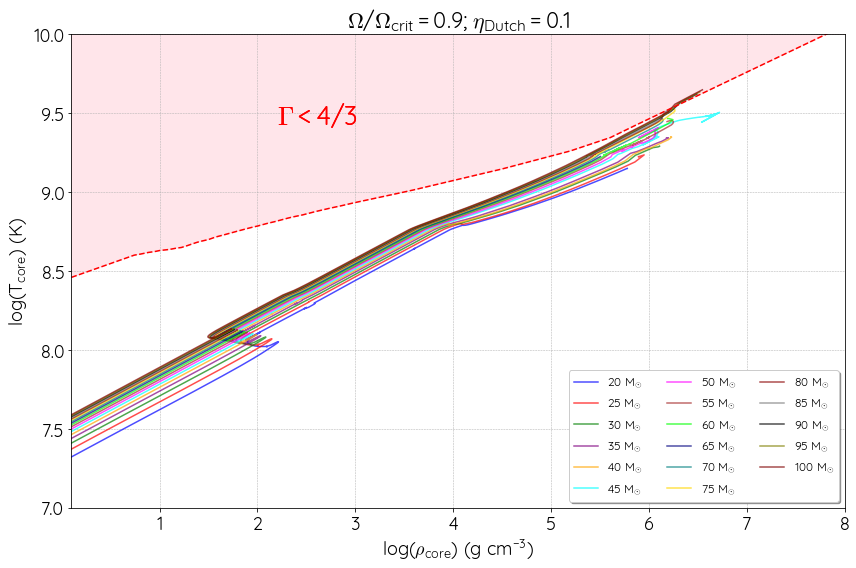

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/../plots/Tc_Rhoc_W0.9_D0.1.pdf


In [19]:
# Configuración de la gráfica
plt.figure(figsize=(12, 8))

# Iterar a través de las simulaciones y colores
for sim, color, mass in zip(simulations, colors, masses):
    # Ruta del archivo history.data
    history_path = os.path.join(base_path, sim, 'history.data')
    if os.path.exists(history_path):
        # Cargar los datos
        history = mr.MesaData(history_path)
        
        # Filtrar puntos iniciales y finales si es necesario (opcional)
        initial_points_to_remove = 10
        final_points_to_remove = 1
        max_index = len(history.log_center_T) - final_points_to_remove
        
        # Graficar log_rho_core vs log_T_core
        plt.plot(history.log_center_Rho[initial_points_to_remove:max_index],
                 history.log_center_T[initial_points_to_remove:max_index],
                 label=fr'${mass}\ M_{{\odot}}$', 
                 color=color, linewidth=1.5, alpha=0.7)
    else:
        print(f"Advertencia: history.data no encontrado para {sim}")

# Opcional: interpolar y sombrear región donde \(\Gamma < 4/3\)
log_rho_range = np.linspace(0.1, 9, 1000)
# Suponiendo que gamma_interp es una función predefinida
log_t_interp = gamma_interp(log_rho_range)
plt.plot(log_rho_range, log_t_interp, color='red', linestyle='--')
plt.fill_between(log_rho_range, log_t_interp, 10, color='pink', alpha=0.4)

# Configuración de los límites y título dinámico
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$\log (\rho_\mathrm{core})\ \mathrm{(g\ cm^{-3})}$', fontsize=18)
plt.ylabel(r'$\log (T_\mathrm{core})\ \mathrm{(K)}$', fontsize=18)
# Título dinámico basado en variables
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$',
    fontsize=22
)

plt.ylim(7, 10)
plt.xlim(0.1, 8)
plt.text(2.2, 9.43, r"$\Gamma < 4/3$", fontsize=26, color='red')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=12, ncol=3, frameon=True, shadow=True)
plt.tight_layout()
plt.text(2.2, 9.43, r"$\Gamma < 4/3$", fontsize=26, color='red')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


# Guardar y mostrar la gráfica con nombre dinámico
output_file = os.path.join(output_path, f'Tc_Rhoc_W{rotation}_D{eta_d}.pdf')
#plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


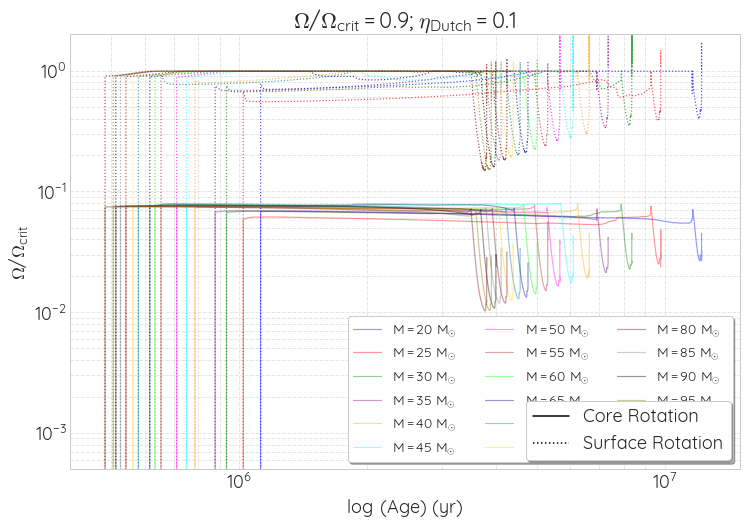

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/../plots/Omega_Age_W0.9_D0.1.pdf


In [25]:
# Configuración de la gráfica
plt.figure(figsize=(12, 8))
# Listas para leyendas
lines = []
labels = []

# Iterar a través de las simulaciones y colores
for sim, color, mass in zip(simulations, colors, masses):
    # Ruta del archivo history.data
    history_path = os.path.join(base_path, sim, 'history.data')
    if os.path.exists(history_path):
        # Cargar los datos
        history = mr.MesaData(history_path)
        
        # Filtrar los últimos puntos si es necesario
        points_to_remove = 1
        max_index = len(history.star_age) - points_to_remove
        age = history.star_age[:max_index]

        # Extraer datos de rotación superficial y del núcleo
        W_Wc_surf = history.surf_avg_omega_div_omega_crit[:max_index]
        W_Wc_core = history.center_omega_div_omega_crit[:max_index]

        # Graficar rotación superficial y del núcleo
        surf_line, = plt.loglog(age, W_Wc_surf, color=color, linestyle='dotted', linewidth=1.2, alpha=0.7)
        core_line, = plt.loglog(age, W_Wc_core, color=color, linestyle='-', linewidth=1.2, alpha=0.4)

        # Guardar las líneas para la leyenda
        lines.append(core_line)
        labels.append(f'$M={mass}\ M_{{\odot}}$')
    else:
        print(f"Advertencia: history.data no encontrado para {sim}")

# Crear leyendas
legend1 = plt.legend(lines, labels, loc='best', fontsize=14, frameon=True, shadow=True, ncol=3)
plt.gca().add_artist(legend1)

solid_line = mlines.Line2D([], [], color='black', linestyle='-', label='Core Rotation')
dotted_line = mlines.Line2D([], [], color='black', linestyle='dotted', label='Surface Rotation')
plt.legend(handles=[solid_line, dotted_line], loc='best', fontsize=18, frameon=True, shadow=True)

# Configuración del gráfico
plt.ylim(0.5e-3, 2e0)
plt.xlim(4e5, 1.5e7)
plt.xlabel(r'$\log$ ${\rm (Age)}$ ${\rm (yr)}$', fontsize=18)
plt.ylabel(r'$\Omega/\Omega_{\mathrm{crit}}$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$',
    fontsize=22
)
plt.grid(True, which='both', linestyle='-.', linewidth=0.5)


# Guardar y mostrar la gráfica con nombre dinámico
output_file = os.path.join(output_path, f'Omega_Age_W{rotation}_D{eta_d}.pdf')
#plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")

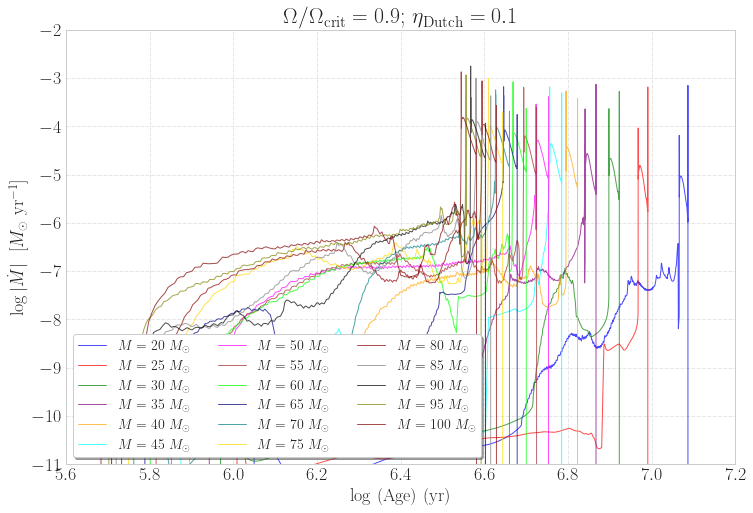

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/../plots/Mdot_Age_W0.9_D0.1.pdf


In [11]:
# Configuración general de la figura
plt.figure(figsize=(12, 8))

# Iterar a través de las simulaciones y colores
for sim, color, mass in zip(simulations, colors, masses):
    # Ruta del archivo history.data
    history_path = os.path.join(base_path, sim, 'history.data')
    if os.path.exists(history_path):
        # Cargar los datos
        history = mr.MesaData(history_path)
        
        # Filtrar puntos finales si es necesario
        points_to_remove = 1
        max_index = len(history.star_age) - points_to_remove
        
        # Extraer edad y \(\dot{M}\)
        age = history.star_age[:max_index]
        mdot = history.log_abs_mdot[:max_index]  # log10(|Mdot|)

        # Graficar \(\log |\dot{M}|\) vs \(\log (\text{Edad})\)
        plt.plot(np.log10(age), mdot, label=f'$M={mass}\ M_{{\odot}}$', color=color, linestyle='-', linewidth=1.0, alpha=0.7)
    else:
        print(f"Advertencia: history.data no encontrado para {sim}")

# Configuración del gráfico
plt.xlim(5.6, 7.2)
plt.ylim(-11, -2)
plt.xlabel(r'$\log$ ${\rm (Age)}$ ${\rm (yr)}$', fontsize=18)
plt.ylabel(r'$\log |\dot{M}|\ \ [M_\odot~\mathrm{yr}^{-1}]$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$',
    fontsize=22
)
plt.grid(True, which='both', linestyle='-.', linewidth=0.5)

# Leyenda
plt.legend(loc='best', fontsize=14, frameon=True, shadow=True, ncol=3)


# Guardar y mostrar la gráfica con nombre dinámico
output_file = os.path.join(output_path, f'Mdot_Age_W{rotation}_D{eta_d}.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")


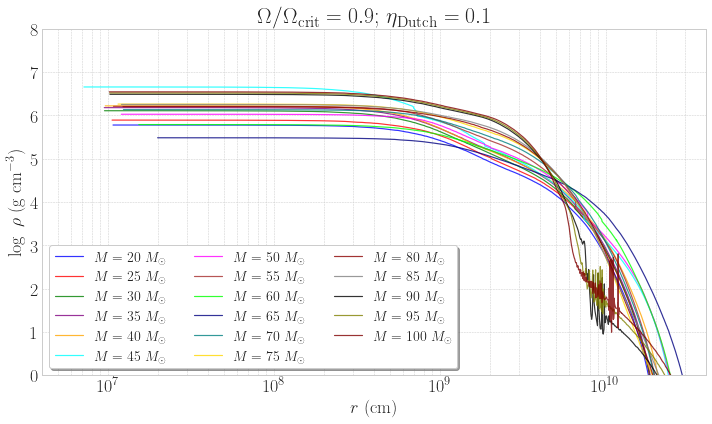

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/../plots/Rho_R_W0.9_D0.1.pdf


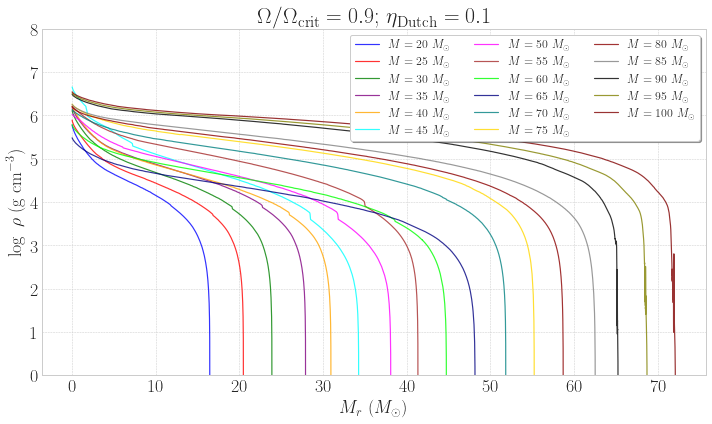

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/../plots/Rho_Mr_W0.9_D0.1.pdf


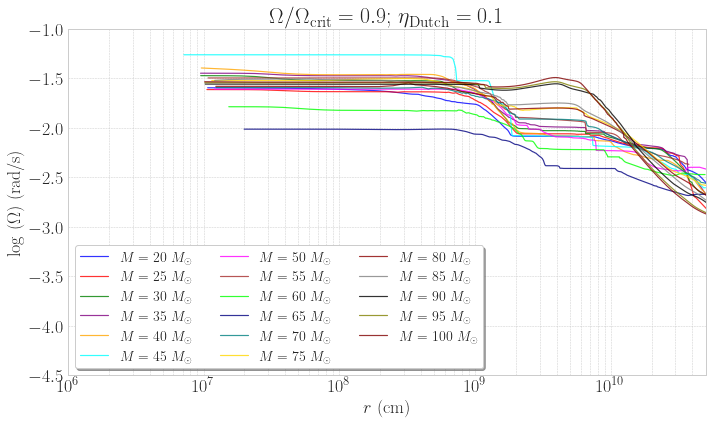

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/../plots/Omega_R_W0.9_D0.1.pdf


In [12]:
# Plot 1: log Rho vs Radius (cm)
plt.figure(figsize=(10, 6))

for sim, color, mass in zip(simulations, colors, masses):
    logs_dir = os.path.join(base_path, sim)
    profile_file = glob.glob(os.path.join(logs_dir, 'profile*.data'))
    if profile_file:  # Verificar que exista al menos un archivo
        profile_file = profile_file[0]  # Obtener el único archivo
        profile_data = mr.MesaData(profile_file)

        radius = profile_data.radius * R_sun_cm
        log_rho = profile_data.logRho

        plt.plot(radius, log_rho, label=f'$M={mass}\ M_\\odot$', color=color, linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        print(f"Advertencia: No se encontró archivo profile*.data en {logs_dir}")

plt.xscale('log')
plt.xlabel(r'$r$ (cm)', fontsize=18)
plt.ylabel(r'$\log\ \rho$ ($\rm g\ cm^{-3}$)', fontsize=18)
plt.ylim(0,8)
plt.xlim(4e6,4e10)
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$',
    fontsize=22
)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower left', fontsize=14, frameon=True, shadow=True, ncol=3)
plt.tight_layout()

# Guardar y mostrar la gráfica con nombre dinámico
output_file = os.path.join(output_path, f'Rho_R_W{rotation}_D{eta_d}.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")

# Plot 2: log Rho vs Enclosed Mass (M_r)
plt.figure(figsize=(10, 6))

for sim, color, mass in zip(simulations, colors, masses):
    logs_dir = os.path.join(base_path, sim)
    profile_file = glob.glob(os.path.join(logs_dir, 'profile*.data'))
    if profile_file:  # Verificar que exista al menos un archivo
        profile_file = profile_file[0]  # Obtener el único archivo
        profile_data = mr.MesaData(profile_file)

        mass_enclosed = profile_data.mass
        log_rho = profile_data.logRho

        plt.plot(mass_enclosed, log_rho, label=f'$M={mass}\ M_\\odot$', color=color, linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        print(f"Advertencia: No se encontró archivo profile*.data en {logs_dir}")

plt.xlabel(r'$M_r$ ($M_\odot$)', fontsize=18)
plt.ylabel(r'$\log\ \rho$ ($\rm g\ cm^{-3}$)', fontsize=18)
plt.ylim(0,8)
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$',
    fontsize=22
)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=12, frameon=True, shadow=True, ncol=3)
plt.tight_layout()

# Guardar y mostrar la gráfica con nombre dinámico
output_file = os.path.join(output_path, f'Rho_Mr_W{rotation}_D{eta_d}.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")
plt.show()

# Plot 3: log(Omega) vs Radius (cm)
plt.figure(figsize=(10, 6))

for sim, color, mass in zip(simulations, colors, masses):
    logs_dir = os.path.join(base_path, sim)
    profile_file = glob.glob(os.path.join(logs_dir, 'profile*.data'))
    if profile_file:  # Verificar que exista al menos un archivo
        profile_file = profile_file[0]  # Obtener el único archivo
        profile_data = mr.MesaData(profile_file)

        radius = profile_data.radius * R_sun_cm
        log_omega = np.log10(profile_data.omega)

        plt.plot(radius, log_omega, label=f'$M={mass}\ M_\\odot$', color=color, linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        print(f"Advertencia: No se encontró archivo profile*.data en {logs_dir}")

plt.xscale('log')
plt.xlim(1e6, 0.5e11)
plt.ylim(-4.5, -1)
plt.xlabel(r'$r$ (cm)', fontsize=18)
plt.ylabel(r'$\log\ (\Omega)$ (rad/s)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$',
    fontsize=22
)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower left', fontsize=14, frameon=True, shadow=True, ncol=3)
plt.tight_layout()

# Guardar y mostrar la gráfica con nombre dinámico
output_file = os.path.join(output_path, f'Omega_R_W{rotation}_D{eta_d}.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")


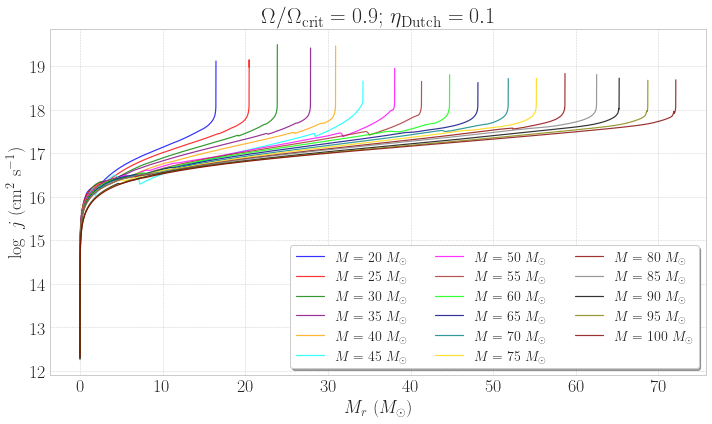

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/../plots/J_Mr_W0.9_D0.1.pdf


In [13]:
# Plot: log(j) vs Enclosed Mass (M_r)
plt.figure(figsize=(10, 6))

for sim, color, mass in zip(simulations, colors, masses):
    logs_dir = os.path.join(base_path, sim)
    profile_file = glob.glob(os.path.join(logs_dir, 'profile*.data'))
    if profile_file:  # Verificar que exista al menos un archivo
        profile_file = profile_file[0]  # Obtener el único archivo
        profile_data = mr.MesaData(profile_file)

        mass_enclosed = profile_data.mass  # M_r en masas solares
        log_j_rot = profile_data.log_j_rot  # Log del momento angular específico

        plt.plot(mass_enclosed, log_j_rot, label=f'$M={mass}\ M_\\odot$', color=color, linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        print(f"Advertencia: No se encontró archivo profile*.data en {logs_dir}")

# Configuración del gráfico
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$M_r$ ($M_\odot$)', fontsize=18)
plt.ylabel(r'$\log \ j$ ($\rm cm^2\ s^{-1}$)', fontsize=18)
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$',
    fontsize=22
)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best', fontsize=14, frameon=True, shadow=True, ncol=3)
plt.tight_layout()


# Guardar y mostrar la gráfica con nombre dinámico
output_file = os.path.join(output_path, f'J_Mr_W{rotation}_D{eta_d}.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")


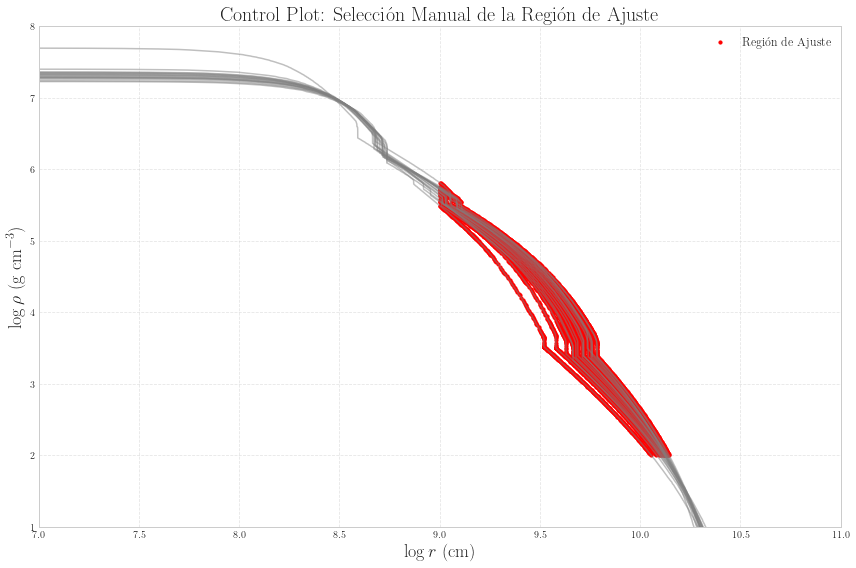


📌 Control Plot guardado en: /fs/phaethon/other0/gibran/sim_results/plots/Control_Plot_W0.9_D1.0.pdf
Ejecutando MCMC...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 408.62it/s]



📌 Resultados MCMC:
 - Pendiente (m): -3.4015 ± 0.2189


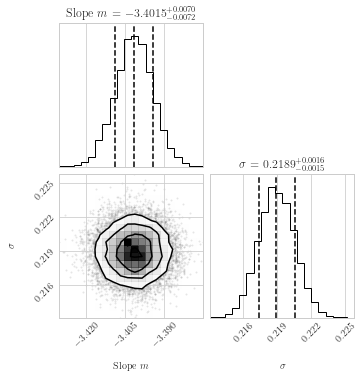


📌 Corner Plot guardado en: /fs/phaethon/other0/gibran/sim_results/plots/Corner_Plot_Slope_Sigma_W0.9_D1.0.pdf


In [22]:
import os
import glob
import numpy as np
import emcee
import corner
import mesa_reader as mr
import matplotlib.pyplot as plt

# **Configuración inicial**
rotation = 0.9
eta_d = 1.0
silicon_fraction = "5d-2"
mass_range = range(20, 105, 5)
base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_{silicon_fraction}_W9_D{eta_d}/'
output_path = f'/fs/phaethon/other0/gibran/sim_results/plots'
os.makedirs(output_path, exist_ok=True)

R_sun_cm = 6.957e10  

# **Arrays globales para almacenar los datos seleccionados**
all_log_r = []
all_log_rho = []

# **FIGURA DE CONTROL: Verificación de la selección manual**
plt.figure(figsize=(12, 8))

# Define una lista de colores para distinguir las simulaciones (opcional)
colors = [
    'green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple', 'yellow', 
    'cyan', 'magenta', 'brown', 'lime', 'teal', 'darkorange', 'red', 'black', 'olive', 'royalblue'
]

for i, mass in enumerate(mass_range):
    simulation = f'{mass}M_W{rotation}_D{eta_d}'
    logs_dir = os.path.join(base_path, simulation)
    profile_files = glob.glob(os.path.join(logs_dir, 'profile*.data'))
    
    if profile_files:
        profile_file = profile_files[0]
        profile_data = mr.MesaData(profile_file)
        
        # **Extraer datos**
        radius = profile_data.radius * R_sun_cm  
        log_rho = profile_data.logRho  
        log_r = np.log10(radius)                

        # **Seleccionar manualmente la región de interés**
        mask = (log_rho > 2) & (log_rho < 7) & (log_r > 9) & (log_r < 10.5)   
        log_r_fit, log_rho_fit = log_r[mask], log_rho[mask]
        
        # **Acumular los datos seleccionados**
        all_log_r.extend(log_r_fit)
        all_log_rho.extend(log_rho_fit)
        
        # **Graficar el perfil completo en gris**
        plt.plot(log_r, log_rho, color="gray", alpha=0.5)
        # **Resaltar la región de ajuste en rojo**
        plt.scatter(log_r_fit, log_rho_fit, color="red", s=10, label="Región de Ajuste" if mass == 20 else "")

plt.xlabel(r'$\log r$ (cm)', fontsize=18)
plt.ylabel(r'$\log \rho$ ($\rm g\ cm^{-3}$)', fontsize=18)
plt.title("Control Plot: Selección Manual de la Región de Ajuste", fontsize=20)
plt.xlim(7, 11)
plt.ylim(1, 8)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

control_plot_file = os.path.join(output_path, f'Control_Plot_W{rotation}_D{eta_d}.pdf')
plt.show()

print(f"\n📌 Control Plot guardado en: {control_plot_file}")

# Convertir listas a arreglos numpy
all_log_r = np.array(all_log_r)
all_log_rho = np.array(all_log_rho)

# **Definir log-verosimilitud para el ajuste lineal con sigma libre**
def log_likelihood(theta, x, y):
    m, b, log_sigma = theta
    model = m * x + b
    sigma2 = np.exp(2 * log_sigma)  
    return -0.5 * np.sum((y - model)**2 / sigma2 + np.log(sigma2))

# **Definir prior uniforme para los parámetros**
def log_prior(theta):
    m, b, log_sigma = theta
    if -4 < m < -2 and -10 < b < 40 and -5 < log_sigma < 1:
        return 0.0
    return -np.inf

# **Función de probabilidad total (posterior en log)**
def log_probability(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y)

# **Configuración del MCMC con emcee**
ndim, nwalkers = 3, 50
initial = np.array([-2.8, 30, np.log(0.1)])
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(all_log_r, all_log_rho))

print("Ejecutando MCMC...")
sampler.run_mcmc(pos, 5000, progress=True)

# **Extraer las cadenas MCMC descartando la fase de quemado y haciendo thinning**
samples = sampler.get_chain(discard=1000, thin=15, flat=True)
m_mcmc, b_mcmc, log_sigma_mcmc = np.median(samples, axis=0)
sigma_mcmc = np.exp(log_sigma_mcmc)

print("\n📌 Resultados MCMC:")
print(f" - Pendiente (m): {m_mcmc:.4f} ± {sigma_mcmc:.4f}")

# **Convertir log_sigma a sigma en las muestras para el Corner Plot**
samples_corner = samples.copy()
samples_corner[:, 2] = np.exp(samples_corner[:, 2])  

# **Generar Corner Plot para la pendiente y sigma**
labels = [r"Slope $m$", r"$\sigma$"]
fig = corner.corner(samples_corner[:, [0, 2]], labels=labels, quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, title_fmt=".4f")
corner_plot_file = os.path.join(output_path, f'Corner_Plot_Slope_Sigma_W{rotation}_D{eta_d}.pdf')
fig.savefig(corner_plot_file, format="pdf")
plt.show()

print(f"\n📌 Corner Plot guardado en: {corner_plot_file}")


In [115]:
import os
import numpy as np
import pandas as pd

# **Configuración inicial**
rotation = 0.9
eta_d = 0.1
silicon_fraction = "5d-2"
mass_range = range(20, 105, 5)
base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_{silicon_fraction}_W9_D{eta_d}/'

# **Parámetros físicos relevantes**
params_to_extract = [
    "star_mass", "log_Teff", "log_L", "log_center_T", "log_center_Rho",
    "surf_avg_v_rot", "surf_avg_j_rot", "surf_avg_omega",
    "surf_avg_omega_crit", "surf_avg_omega_div_omega_crit", "surf_avg_v_crit",
    "surf_avg_v_div_v_crit", "surf_avg_Lrad_div_Ledd", "center_omega", "center_omega_div_omega_crit",
    "center_j_rot", "center_v_rot",
    "he_core_mass", "co_core_mass", "one_core_mass", "fe_core_mass",
    "kh_timescale", "log_cntr_P"
]

# **Constantes físicas**
Msun = 1.989e33  # Masa del Sol en g
Rsun = 6.957e10  # Radio del Sol en cm
R_NS = 12e5  # Radio de la estrella de neutrones en cm (12 km)
I_NS = 1.6e45  # Momento de inercia de la estrella de neutrones en g cm²
G = 6.67430e-8  # Constante gravitacional en cm³ g⁻¹ s⁻²

# **Lista para almacenar resultados**
data = []

# **Leer archivos de cada simulación**
for mass in mass_range:
    simulation = f"{mass}M_W{rotation}_D{eta_d}"
    logs_dir = os.path.join(base_path, simulation)
    history_file = os.path.join(logs_dir, "history.data")

    if os.path.exists(history_file):
        with open(history_file, "r") as file:
            lines = file.readlines()

        # **Buscar la línea con los nombres de las columnas**
        header_line_index = next(i for i, line in enumerate(lines) if "log_Teff" in line)
        header = lines[header_line_index].split()

        # **Identificar los parámetros disponibles**
        available_columns = [col for col in params_to_extract if col in header]

        # **Buscar la última línea de datos**
        last_valid_line = next((line for line in reversed(lines) if line.strip() and not line.startswith("!")), None)

        if last_valid_line:
            values = last_valid_line.split()
            extracted_values = [mass]  # Iniciar con la masa inicial

            for param in available_columns:
                col_index = header.index(param)
                extracted_values.append(float(values[col_index]) if col_index < len(values) else np.nan)

            data.append(extracted_values)
    else:
        print(f"❌ Archivos no encontrados para {simulation}")

# **Crear DataFrame**
columns = ["M_ini"] + available_columns
df = pd.DataFrame(data, columns=columns)

# **Convertir $j_{\mathrm{rot}}$ a $\log j_{\mathrm{rot}}$**
df["log_surf_avg_j_rot"] = np.log10(df["surf_avg_j_rot"].replace(0, np.nan))  # Evita log(0)
df.drop(columns=["surf_avg_j_rot"], inplace=True)  # Elimina la columna original

# **Cálculo del período de rotación de la estrella de neutrones**
def calculate_rotation_period_NS(row):
    """
    Calcula el periodo de rotación en milisegundos para una estrella de neutrones
    de 12 km de radio y 1.4 Msol de masa.
    """
    if row["log_surf_avg_j_rot"] > 0:  # Validar que no haya valores nulos
        J_total = row["star_mass"] * Msun * 10**row["log_surf_avg_j_rot"]  # Convertir log(j) a j
        P_NS = (2 * np.pi * I_NS) / J_total  # Periodo en segundos
        return P_NS * 1e3  # Convertir a milisegundos
    return np.nan  # Si no hay datos válidos

# **Aplicar el cálculo**
df["P_rot_NS_ms"] = df.apply(calculate_rotation_period_NS, axis=1)

# **Ordenar DataFrame**
df = df.sort_values(by="M_ini").reset_index(drop=True)

# **Mostrar y guardar resultados**
print(df)
df.to_csv("final_stellar_parameters.csv", index=False)

    M_ini  star_mass  log_Teff      log_L  log_center_T  log_center_Rho  \
0      20  16.455781  5.010373   6.096915      9.149121        5.780045   
1      25  20.472767  4.847377   5.961242      9.222701        5.893830   
2      30  23.881313  5.726053   8.424728      9.289320        6.109913   
3      35  27.902540  4.612809   4.446522      9.341925        6.181128   
4      40  30.936725  5.454966   7.497721      9.347485        6.221925   
5      45  34.251201  6.355746  10.088667      9.481470        6.658416   
6      50  38.085468  5.733090   7.627920      9.385245        6.028645   
7      55  41.336775  5.457430   6.243632      9.445029        6.184895   
8      60  44.735233  5.334713   6.249349      9.464412        6.190837   
9      65  48.162276  5.427031   6.424544      9.222212        5.485784   
10     70  51.833735  5.399164   6.308829      9.463205        6.122882   
11     75  55.237705  5.375999   6.228425      9.517064        6.220972   
12     80  58.699305  5.3

In [47]:
import os
import numpy as np

# --- Configuration ---
rotation = 0.9
eta_d = 0.5
silicon_fraction = "5d-2"
mass_range = range(20, 105, 5)
base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_{silicon_fraction}_W9_D{eta_d}/'

# Define threshold for the end of core He burning (e.g., center_he4 < 0.01)
threshold_center_he4 = 0.01

# Loop through each simulation
for mass in mass_range:
    simulation = f"{mass}M_W{rotation}_D{eta_d}"
    logs_dir = os.path.join(base_path, simulation)
    history_file = os.path.join(logs_dir, "history.data")
    
    if os.path.exists(history_file):
        with open(history_file, "r") as file:
            lines = file.readlines()
        
        # Find the header line (looking for "center_he4" in the header)
        header_line_index = next(i for i, line in enumerate(lines) if "center_he4" in line)
        header = lines[header_line_index].split()
        
        # Get all valid data lines after the header
        valid_lines = [line for line in lines[header_line_index+1:] if line.strip() and not line.startswith("!")]
        
        # Search for the first record where center_he4 is below the threshold (i.e., end of He burning)
        selected_line = None
        for line in valid_lines:
            values = line.split()
            try:
                center_he4_val = float(values[header.index("center_he4")])
            except (IndexError, ValueError):
                continue
            if center_he4_val < threshold_center_he4:
                selected_line = line
                break
        
        if selected_line:
            values = selected_line.split()
            try:
                # Extract surface rotational velocity in cm/s
                v_rot_cm_s = float(values[header.index("surf_avg_v_rot")])
            except (IndexError, ValueError):
                v_rot_cm_s = None
            
            if v_rot_cm_s is not None:
                # Convert from cm/s to km/s (1 km/s = 1e5 cm/s)
                v_rot_km_s = v_rot_cm_s / 1e5
                print(f"Simulation: {simulation}")
                print(f"  center_he4: {float(values[header.index('center_he4')]):.3e}")
                print(f"  Surface rotational velocity at end of core He burning: {v_rot_cm_s:.3e} cm/s ({v_rot_km_s:.3f} km/s)")
                print("-" * 40)
            else:
                print(f"Simulation: {simulation} - Could not extract surface rotational velocity.")
        else:
            print(f"Simulation: {simulation} - No record found with center_he4 below {threshold_center_he4}.")
    else:
        print(f"Simulation: {simulation} - History file not found.")


Simulation: 20M_W0.9_D0.5
  center_he4: 9.864e-03
  Surface rotational velocity at end of core He burning: 2.353e+01 cm/s (0.000 km/s)
----------------------------------------
Simulation: 25M_W0.9_D0.5
  center_he4: 9.715e-03
  Surface rotational velocity at end of core He burning: 1.865e+01 cm/s (0.000 km/s)
----------------------------------------
Simulation: 30M_W0.9_D0.5
  center_he4: 9.722e-03
  Surface rotational velocity at end of core He burning: 1.529e+01 cm/s (0.000 km/s)
----------------------------------------
Simulation: 35M_W0.9_D0.5
  center_he4: 9.955e-03
  Surface rotational velocity at end of core He burning: 1.375e+01 cm/s (0.000 km/s)
----------------------------------------
Simulation: 40M_W0.9_D0.5
  center_he4: 9.960e-03
  Surface rotational velocity at end of core He burning: 1.320e+01 cm/s (0.000 km/s)
----------------------------------------
Simulation: 45M_W0.9_D0.5
  center_he4: 9.940e-03
  Surface rotational velocity at end of core He burning: 1.226e+01 cm/

In [116]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv("final_stellar_parameters.csv")

# --- Scale columns if needed ---
# For example, scale surf_avg_omega by 1e-5 and surf_avg_omega_crit by 1e-3
df["surf_avg_omega"]      = df["surf_avg_omega"]      / 1e-5
df["surf_avg_omega_crit"] = df["surf_avg_omega_crit"] / 1e-3
# Scale the KH timescale to 10^4 s
df["kh_timescale"]        = df["kh_timescale"]        / 1e4

# --- Reorder columns (omitting any you don't want, e.g., period) ---
columns_order = [
    "M_ini",              # $M_{\mathrm{ini}}\ ^{\mathrm{a}}$
    "star_mass",          # $M_{\mathrm{pre-SN}}\ ^{\mathrm{b}}$
    "log_Teff",           # $\log T_{\mathrm{eff}}\ ^{\mathrm{c}}$
    "log_L",              # $\log L\ ^{\mathrm{d}}$
    "log_center_Rho",     # $\log \rho_{\mathrm{c}}\ ^{\mathrm{e}}$
    "surf_avg_v_rot",     # $v_{\mathrm{rot}}\ ^{\mathrm{f}}$
    "log_surf_avg_j_rot", # $\log j_{\mathrm{rot}}\ ^{\mathrm{g}}$
    "surf_avg_omega",     # $\Omega_{\mathrm{surf}}\ ^{\mathrm{h}}$
    "surf_avg_omega_crit",# $\Omega_{\mathrm{crit}}\ ^{\mathrm{i}}$
    "center_omega",       # (will be labeled as $\Omega_{\mathrm{core}}$)
    "he_core_mass",       # $M_{\mathrm{He}}\ ^{\mathrm{m}}$
    "co_core_mass",       # $M_{\mathrm{CO}}\ ^{\mathrm{n}}$
    "one_core_mass",      # (will be labeled as $M_{\mathrm{O-Ne}}$)
    "fe_core_mass",       # $M_{\mathrm{Fe}}\ ^{\mathrm{p}}$
    "kh_timescale",       # $t_{\mathrm{KH}}\ ^{\mathrm{q}}$
    "log_cntr_P",         # $\log P_{\mathrm{c}}\ ^{\mathrm{r}}$
]

df = df[columns_order]

# --- Format function for numeric values ---
def format_number(x):
    """Show up to 3 decimals if needed, else integer."""
    try:
        if isinstance(x, (float, np.floating)):
            if np.isclose(x, int(x)):
                return f"{int(x)}"
            else:
                return f"{x:.3f}"
        elif isinstance(x, (int, np.integer)):
            return f"{x}"
        else:
            return str(x)
    except:
        return str(x)

# --- Build the LaTeX table ---
# 1) Header row (column names with space before superscript)
headers = [
    r"$M_{\mathrm{ini}}\ ^{\mathrm{a}}$",
    r"$M_{\mathrm{pre-SN}}\ ^{\mathrm{b}}$",
    r"$\log T_{\mathrm{eff}}\ ^{\mathrm{c}}$",
    r"$\log L\ ^{\mathrm{d}}$",
    r"$\log \rho_{\mathrm{c}}\ ^{\mathrm{e}}$",
    r"$v_{\mathrm{rot}}\ ^{\mathrm{f}}$",
    r"$\log j_{\mathrm{rot}}\ ^{\mathrm{g}}$",
    r"$\Omega_{\mathrm{surf}}\ ^{\mathrm{h}}$",
    r"$\Omega_{\mathrm{crit}}\ ^{\mathrm{i}}$",
    # Here we rename "center_omega" -> $\Omega_{\mathrm{core}}$
    r"$\Omega_{\mathrm{core}}\ ^{\mathrm{k}}$",
    r"$M_{\mathrm{He}}\ ^{\mathrm{m}}$",
    r"$M_{\mathrm{CO}}\ ^{\mathrm{n}}$",
    # Here we rename "one_core_mass" -> $M_{\mathrm{O-Ne}}$
    r"$M_{\mathrm{O-Ne}}\ ^{\mathrm{o}}$",
    r"$M_{\mathrm{Fe}}\ ^{\mathrm{p}}$",
    r"$t_{\mathrm{KH}}\ ^{\mathrm{q}}$",
    r"$\log P_{\mathrm{c}}\ ^{\mathrm{r}}$"
]

# 2) Units row
units = [
    r"$(M_{\odot})$",
    r"$(M_{\odot})$",
    r"(K)",
    r"$(L_{\odot})$",
    r"$(\mathrm{g\,cm^{-3}})$",
    r"(km\,s$^{-1}$)",
    r"(cm$^2$\,s$^{-1}$)",
    r"$(10^{-5}\,\mathrm{rad\,s^{-1}})$",
    r"$(10^{-3}\,\mathrm{rad\,s^{-1}})$",
    r"(rad\,s$^{-1}$)",
    r"$(M_{\odot})$",
    r"$(M_{\odot})$",
    r"$(M_{\odot})$",
    r"$(M_{\odot})$",
    r"$(10^4\,s)$",
    r"(dyne\,cm$^{-2}$)"
]

latex_table = r"""\begin{table*}
\centering
\resizebox{\textwidth}{!}{
\begin{tabular}{cccccccccccccccc}
\hline
"""

# Add the header row
latex_table += " & ".join(headers) + r" \\" + "\n"
# Add the units row
latex_table += " & ".join(units) + r" \\" + "\n"
latex_table += r"\hline" + "\n"

# Append the data rows
for _, row in df.iterrows():
    row_str = " & ".join([format_number(val) for val in row])
    latex_table += row_str + r" \\" + "\n"

latex_table += r"""\hline
\end{tabular}
}
\end{table*}"""

# Print the LaTeX code
print(latex_table)


\begin{table*}
\centering
\resizebox{\textwidth}{!}{
\begin{tabular}{cccccccccccccccc}
\hline
$M_{\mathrm{ini}}\ ^{\mathrm{a}}$ & $M_{\mathrm{pre-SN}}\ ^{\mathrm{b}}$ & $\log T_{\mathrm{eff}}\ ^{\mathrm{c}}$ & $\log L\ ^{\mathrm{d}}$ & $\log \rho_{\mathrm{c}}\ ^{\mathrm{e}}$ & $v_{\mathrm{rot}}\ ^{\mathrm{f}}$ & $\log j_{\mathrm{rot}}\ ^{\mathrm{g}}$ & $\Omega_{\mathrm{surf}}\ ^{\mathrm{h}}$ & $\Omega_{\mathrm{crit}}\ ^{\mathrm{i}}$ & $\Omega_{\mathrm{core}}\ ^{\mathrm{k}}$ & $M_{\mathrm{He}}\ ^{\mathrm{m}}$ & $M_{\mathrm{CO}}\ ^{\mathrm{n}}$ & $M_{\mathrm{O-Ne}}\ ^{\mathrm{o}}$ & $M_{\mathrm{Fe}}\ ^{\mathrm{p}}$ & $t_{\mathrm{KH}}\ ^{\mathrm{q}}$ & $\log P_{\mathrm{c}}\ ^{\mathrm{r}}$ \\
$(M_{\odot})$ & $(M_{\odot})$ & (K) & $(L_{\odot})$ & $(\mathrm{g\,cm^{-3}})$ & (km\,s$^{-1}$) & (cm$^2$\,s$^{-1}$) & $(10^{-5}\,\mathrm{rad\,s^{-1}})$ & $(10^{-3}\,\mathrm{rad\,s^{-1}})$ & (rad\,s$^{-1}$) & $(M_{\odot})$ & $(M_{\odot})$ & $(M_{\odot})$ & $(M_{\odot})$ & $(10^4\,s)$ & (dyne\,cm$^{-2}$

In [118]:
!pwd

/fs/phaethon/other0/gibran/mesa/profiles/calzonzin


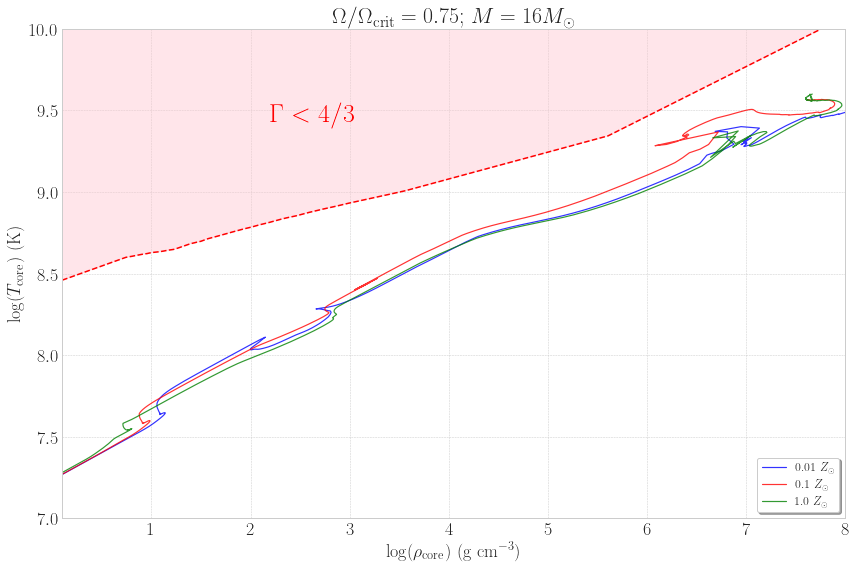

📌 Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/plots/Tc_Rhoc_W0.75_16M.pdf


In [134]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
from scipy.interpolate import interp1d
import glob
import time

# Registrar el inicio de la ejecución
start_time = time.time()

# Parámetros iniciales
rotation = 0.75  # Rotación crítica
mass = 16  # Masa fija de 16M☉

# Directorio base de simulaciones
base_path = "/fs/phaethon/other0/gibran/sim_results/woosley"
output_path = "/fs/phaethon/other0/gibran/sim_results/plots" 
# Directorio de salida para gráficos

os.makedirs(output_path, exist_ok=True)

# Colores para cada metalicidad
colors = ["blue", "red", "green"]
metallicities = ["0.01Zsun", "0.1Zsun", "Zsun"]  # Diferentes metalicidades

# Diccionario para etiquetas personalizadas
labels = {"0.01Zsun": "0.01", "0.1Zsun": "0.1", "Zsun": "1.0"}

# -------------------------------
# FUNCIÓN PARA INTERPOLAR LA REGIÓN \(\Gamma < 4/3\)
# -------------------------------
def gamma_interpolated():
    gamma_data = np.array([
        [0.7007, 8.5904], [0.7406, 8.5991], [0.7668, 8.6024], [0.7963, 8.6048],
        [0.8239, 8.6086], [0.8543, 8.6120], [0.8831, 8.6161], [0.9285, 8.6205],
        [0.9556, 8.6224], [0.9930, 8.6281], [1.0451, 8.6312], [1.0840, 8.6341],
        [1.1154, 8.6369], [1.1591, 8.6426], [1.2202, 8.6474], [1.2542, 8.6533],
        [1.3436, 8.6728], [1.3950, 8.6829], [1.4485, 8.6912], [1.4979, 8.6976],
        [1.5678, 8.7132], [1.6288, 8.7227], [1.7025, 8.7355], [1.7753, 8.7482],
        [1.8551, 8.7608], [1.9293, 8.7734], [1.9946, 8.7824], [2.0843, 8.7980],
        [2.1572, 8.8081], [2.2524, 8.8244], [2.3462, 8.8393], [2.4509, 8.8524],
        [2.5545, 8.8695], [2.7059, 8.8921], [2.8305, 8.9081], [2.9469, 8.9255],
        [3.0739, 8.9426], [3.5477, 9.0054], [5.6032, 9.3433], [5.7806, 9.3974]
    ])
    log_rhoc, log_tc = gamma_data[:, 0], gamma_data[:, 1]
    return interp1d(log_rhoc, log_tc, kind='linear', bounds_error=False, fill_value='extrapolate')

gamma_interp = gamma_interpolated()

# -------------------------------
# GRÁFICO: T_CORE vs RHO_CORE
# -------------------------------
plt.figure(figsize=(12, 8))

for metallicity, color in zip(metallicities, colors):
    sim_name = f"{mass}_{metallicity}_W{rotation}"
    logs_dir = os.path.join(base_path, sim_name)
    history_file = os.path.join(logs_dir, "history.data")

    if os.path.exists(history_file):
        history = mr.MesaData(history_file)

        log_T_core = history.log_center_T  # Temperatura central
        log_rho_core = history.log_center_Rho  # Densidad central

        # Graficar T_core vs Rho_core
        plt.plot(log_rho_core, log_T_core, 
                 label=fr'{labels[metallicity]} $Z_\odot$', 
                 color=color, linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        print(f"Advertencia: No se encontró archivo history.data en {logs_dir}")

# Interpolación y sombreado para \(\Gamma < 4/3\)
log_rho_range = np.linspace(0.1, 9, 1000)
log_t_interp = gamma_interp(log_rho_range)
plt.plot(log_rho_range, log_t_interp, color='red', linestyle='--')
plt.fill_between(log_rho_range, log_t_interp, 10, color='pink', alpha=0.4)

# Configuración del gráfico
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(7, 10)
plt.xlim(0.1, 8)
plt.xlabel(r'$\log (\rho_\mathrm{core})\ \mathrm{(g\ cm^{-3})}$', fontsize=18)
plt.ylabel(r'$\log (T_\mathrm{core})\ \mathrm{(K)}$', fontsize=18)
plt.title(rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $M = {mass} M_\odot$', fontsize=22)
plt.text(2.2, 9.43, r"$\Gamma < 4/3$", fontsize=26, color='red')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True, ncol=1)
plt.tight_layout()

# Guardar y mostrar el gráfico
output_file = os.path.join(output_path, f'Tc_Rhoc_W{rotation}_{mass}M.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"📌 Gráfico guardado en: {output_file}")


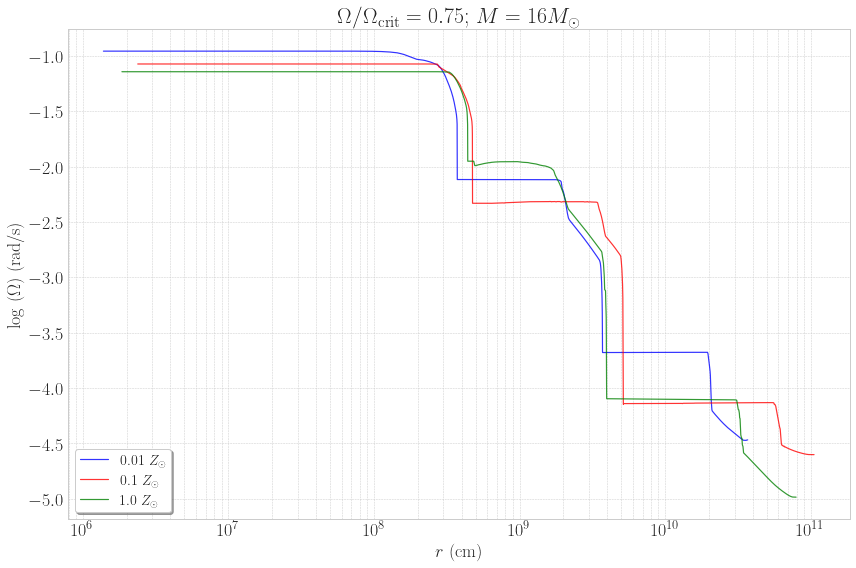

📌 Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/plots/Omega_R_W0.75_16M.pdf


In [131]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
import glob

# Parámetros iniciales
rotation = 0.75  # Rotación crítica
mass = 16  # Masa fija en 16M☉
metallicities = ["0.01Zsun", "0.1Zsun", "Zsun"]  # Diferentes metalicidades

# Diccionario para etiquetas personalizadas
labels = {"0.01Zsun": "0.01", "0.1Zsun": "0.1", "Zsun": "1.0"}

# Directorios de simulaciones y salida
base_path = "/fs/phaethon/other0/gibran/sim_results/woosley"
output_path = "/fs/phaethon/other0/gibran/sim_results/plots"  # Ruta de salida
os.makedirs(output_path, exist_ok=True)

# Colores para cada metalicidad
colors = ["blue", "red", "green"]

# Escala en cm del radio solar
R_sun_cm = 6.957e10  

# -------------------------------
# GRÁFICO: LOG(Ω) vs RADIO
# -------------------------------
plt.figure(figsize=(12, 8))

for metallicity, color in zip(metallicities, colors):
    sim_name = f"{mass}_{metallicity}_W{rotation}"
    logs_dir = os.path.join(base_path, sim_name)
    profile_file = glob.glob(os.path.join(logs_dir, "profile*.data"))

    if profile_file:  
        profile_data = mr.MesaData(profile_file[0])

        radius = profile_data.radius * R_sun_cm  # Convertir radio a cm
        log_omega = np.log10(profile_data.omega)  # Logaritmo de la frecuencia angular

        # Graficar perfil de Ω
        plt.plot(radius, log_omega, 
                 label=fr'{labels[metallicity]} $Z_\odot$', 
                 color=color, linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        print(f"Advertencia: No se encontró archivo profile*.data en {logs_dir}")

# Configuración del gráfico
plt.xscale('log')
#plt.xlim(3e7, 2e11)
#plt.ylim(-3.5, -1)
plt.xlabel(r'$r$ (cm)', fontsize=18)
plt.ylabel(r'$\log\ (\Omega)$ (rad/s)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $M = {mass} M_\odot$', fontsize=22)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower left', fontsize=14, frameon=True, shadow=True, ncol=1)
plt.tight_layout()

# Guardar y mostrar el gráfico
output_file = os.path.join(output_path, f'Omega_R_W{rotation}_{mass}M.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"📌 Gráfico guardado en: {output_file}")


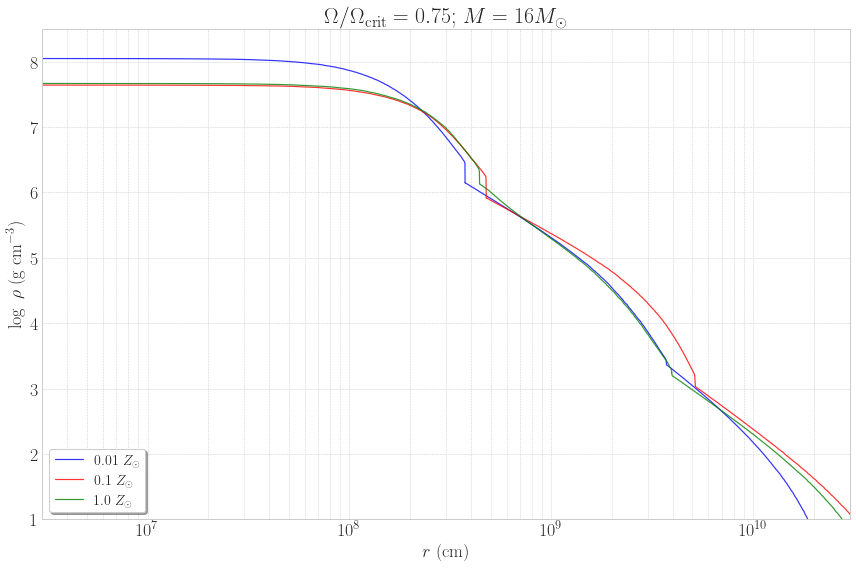

📌 Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/woosley/plots/Rho_R_W0.75_16M.pdf


In [143]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
import glob

# Parámetros iniciales
rotation = 0.75  # Rotación crítica
mass = 16  # Masa fija en 16M☉
metallicities = ["0.01Zsun", "0.1Zsun", "Zsun"]  # Diferentes metalicidades

# Diccionario para etiquetas personalizadas
labels = {"0.01Zsun": "0.01", "0.1Zsun": "0.1", "Zsun": "1.0"}

# Directorios de simulaciones y salida
base_path = "/fs/phaethon/other0/gibran/sim_results/woosley"

os.makedirs(output_path, exist_ok=True)

# Colores para cada metalicidad
colors = ["blue", "red", "green"]

# Escala en cm del radio solar
R_sun_cm = 6.957e10  

# -------------------------------
# GRÁFICO: LOG(ρ) vs RADIO
# -------------------------------
plt.figure(figsize=(12, 8))

for metallicity, color in zip(metallicities, colors):
    sim_name = f"{mass}_{metallicity}_W{rotation}"
    logs_dir = os.path.join(base_path, sim_name)
    profile_file = glob.glob(os.path.join(logs_dir, "profile*.data"))

    if profile_file:  
        profile_data = mr.MesaData(profile_file[0])

        radius = profile_data.radius * R_sun_cm  # Convertir radio a cm
        log_rho = profile_data.logRho  # Logaritmo de la densidad

        # Graficar perfil de densidad
        plt.plot(radius, log_rho, 
                 label=fr'{labels[metallicity]} $Z_\odot$', 
                 color=color, linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        print(f"Advertencia: No se encontró archivo profile*.data en {logs_dir}")

# Configuración del gráfico
plt.xscale('log')
plt.ylim(1,8.5)
plt.xlim(3e6,3e10)
plt.xlabel(r'$r$ (cm)', fontsize=18)
plt.ylabel(r'$\log\ \rho$ ($\rm g\ cm^{-3}$)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $M = {mass} M_\odot$', fontsize=22)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower left', fontsize=14, frameon=True, shadow=True, ncol=1)
plt.tight_layout()

# Guardar y mostrar el gráfico
output_file = os.path.join(output_path, f'Rho_R_W{rotation}_{mass}M.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"📌 Gráfico guardado en: {output_file}")


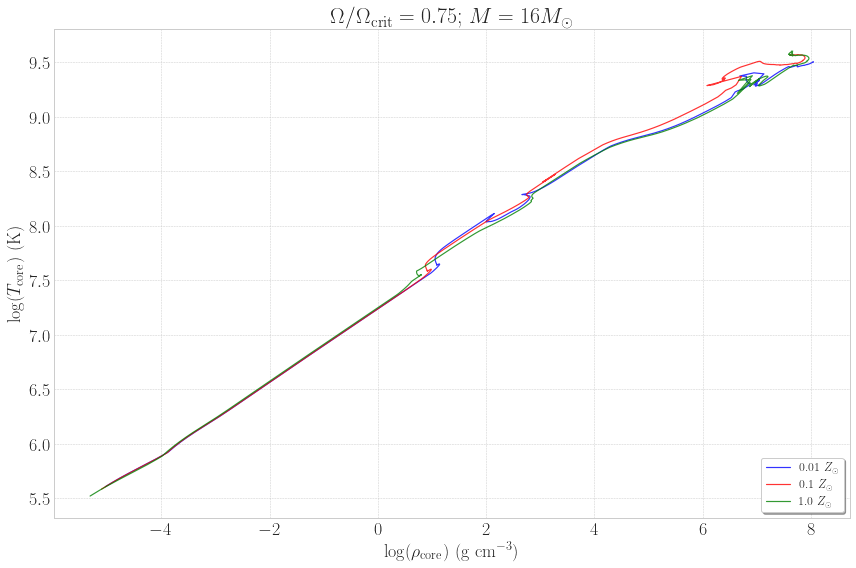

📌 Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/plots/Tc_Rhoc_W0.75_16M.pdf


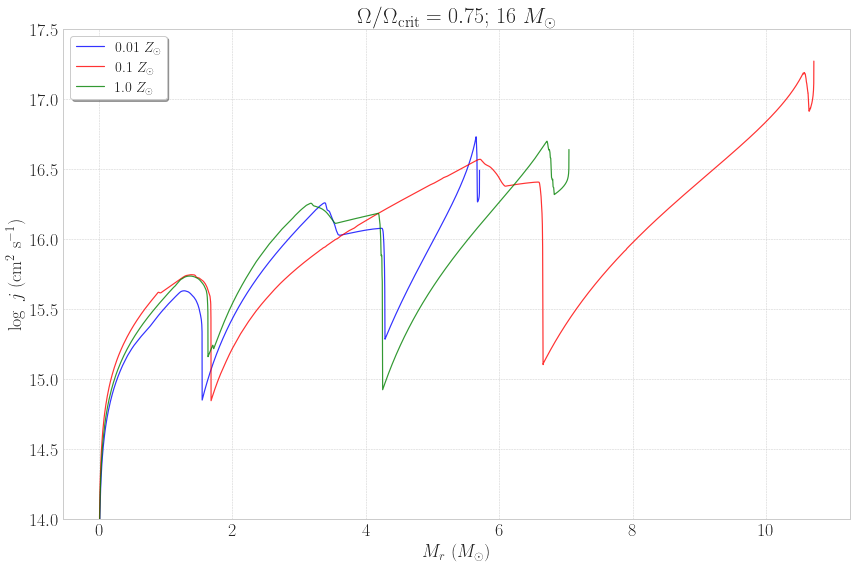

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/woosley/plots/J_Mr_W0.75_16M.pdf


In [137]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
import glob
import time

# Registrar el inicio de la simulación
start_time = time.time()

# Parámetros de la simulación
rotation = 0.75  # Fracción crítica de rotación
mass = 16  # Masa en M_sun
metallicities = ["0.01Zsun", "0.1Zsun", "Zsun"]  # Diferentes valores de metalicidad
base_path = "/fs/phaethon/other0/gibran/sim_results/woosley"
output_path = "/fs/phaethon/other0/gibran/sim_results/plots"  # Ruta de salida

# Asignar colores a cada metalicidad
colors = ["blue", "red", "green"]
labels = {"0.01Zsun": "0.01", "0.1Zsun": "0.1", "Zsun": "1.0"}

# Crear figura
plt.figure(figsize=(12, 8))

for Z, color in zip(metallicities, colors):
    sim_path = os.path.join(base_path, f"{mass}_{Z}_W{rotation}")
    profile_files = glob.glob(os.path.join(sim_path, "profile*.data"))
    
    if profile_files:
        profile_file = profile_files[0]  # Tomar el primer archivo de perfil
        profile_data = mr.MesaData(profile_file)

        mass_enclosed = profile_data.mass  # M_r en masas solares
        log_j_rot = profile_data.log_j_rot  # Log del momento angular específico

        plt.plot(mass_enclosed, log_j_rot, 
                 label=fr'{labels[Z]} $Z_\odot$', 
                 color=color, linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        print(f"Advertencia: No se encontró archivo profile*.data en {sim_path}")

# Configuración del gráfico
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(14, 17.5)
plt.xlabel(r'$M_r$ ($M_\odot$)', fontsize=18)
plt.ylabel(r'$\log \ j$ ($\rm cm^2\ s^{-1}$)', fontsize=18)
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; 16 $M_\odot$',
    fontsize=22
)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best', fontsize=14, frameon=True, shadow=True, ncol=1)
plt.tight_layout()

# Guardar y mostrar la gráfica con nombre dinámico
output_path = os.path.join(base_path, "plots")
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, f'J_Mr_W{rotation}_16M.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")



In [144]:
!pwd

/fs/phaethon/other0/gibran/mesa/profiles/calzonzin


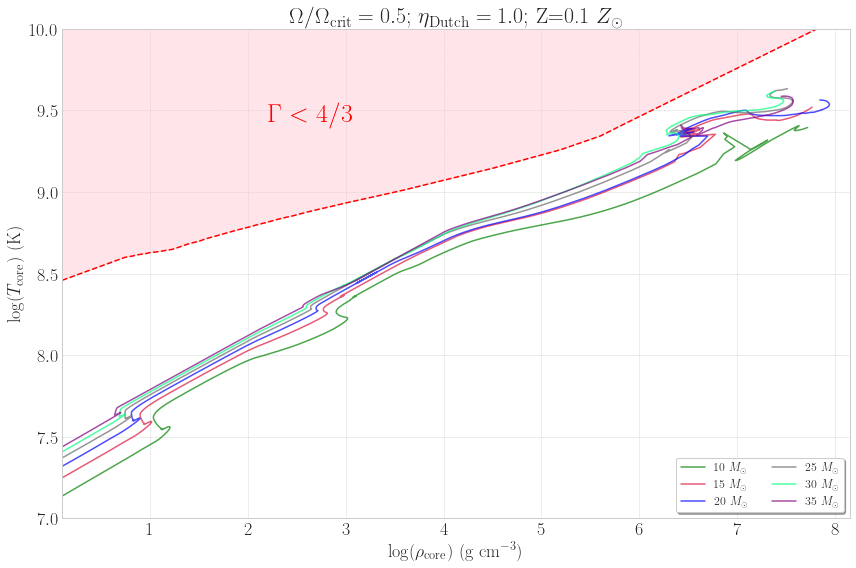

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/plots/Tc_Rhoc_W0.5_D1.0_Z0.1.pdf


In [193]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

# Definir parámetros dinámicos
rotation = 0.5  # Fracción crítica de rotación
eta_d = 1.0  # Dutch wind scaling factor
Z = "0.1"  # Metalicidad en fracción solar
mass_range = [10, 15, 20, 25, 30, 35]  # Rangos de masas en M_sun

# Directorio base y de salida
base_path = "/fs/phaethon/other0/gibran/sim_results/woosley/W0.75"
output_path = "/fs/phaethon/other0/gibran/sim_results/plots"
os.makedirs(output_path, exist_ok=True)

# Generar los nombres de simulaciones dinámicamente
simulations = [f"{mass}M_D{eta_d}_Z{Z}" for mass in mass_range]

# Definir colores para las curvas
colors = ['green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple']

# Inicializar la figura
plt.figure(figsize=(12, 8))

# Iterar a través de las simulaciones y colores
for sim, color, mass in zip(simulations, colors, mass_range):
    # Ruta del archivo history.data
    history_path = os.path.join(base_path, sim, 'history.data')

    if os.path.exists(history_path):
        try:
            # Cargar los datos
            history = mr.MesaData(history_path)

            # Filtrar puntos iniciales y finales si es necesario
            initial_points_to_remove = 1
            final_points_to_remove = 1
            max_index = len(history.log_center_T) - final_points_to_remove

            # Graficar log_rho_core vs log_T_core
            plt.plot(history.log_center_Rho[initial_points_to_remove:max_index],
                     history.log_center_T[initial_points_to_remove:max_index],
                     label=fr'${mass}\ M_{{\odot}}$', 
                     color=color, linewidth=1.5, alpha=0.7)
        except Exception as e:
            print(f"Error procesando {sim}: {e}")
    else:
        print(f"Advertencia: history.data no encontrado para {sim}")

# Opcional: interpolar y sombrear región donde \(\Gamma < 4/3\)
log_rho_range = np.linspace(0.1, 9, 1000)
# Suponiendo que gamma_interp es una función predefinida
log_t_interp = gamma_interp(log_rho_range)
plt.plot(log_rho_range, log_t_interp, color='red', linestyle='--')
plt.fill_between(log_rho_range, log_t_interp, 10, color='pink', alpha=0.4)

# Configuración de los límites y título dinámico
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$\log (\rho_\mathrm{core})\ \mathrm{(g\ cm^{-3})}$', fontsize=18)
plt.ylabel(r'$\log (T_\mathrm{core})\ \mathrm{(K)}$', fontsize=18)
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$; Z={Z} $Z_\odot$',
    fontsize=22
)

plt.ylim(7, 10)
plt.xlim(0.1, 8.15)
plt.text(2.2, 9.43, r"$\Gamma < 4/3$", fontsize=26, color='red')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=12, ncol=2, frameon=True, shadow=True)
plt.tight_layout()

# Guardar el gráfico
output_file = os.path.join(output_path, f'Tc_Rhoc_W{rotation}_D{eta_d}_Z{Z}.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")


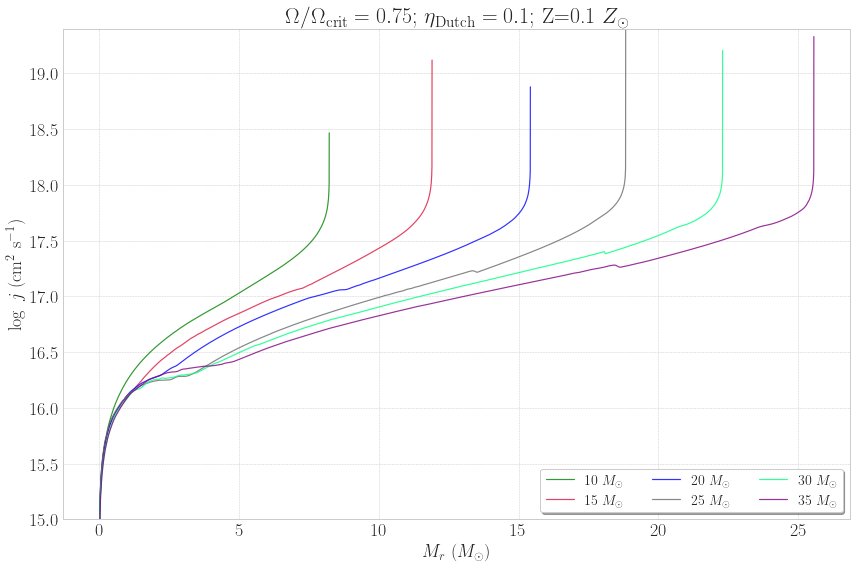

Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/plots/J_Mr_W0.75_D0.1_Z0.1.pdf


In [198]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
import glob

# Definir parámetros dinámicos
rotation = 0.75  # Fracción crítica de rotación
eta_d = 0.1  # Dutch wind scaling factor
Z = "0.1"  # Metalicidad en fracción solar
mass_range = [10, 15, 20, 25, 30, 35]  # Rangos de masas en M_sun

# Directorio base y de salida
base_path = "/fs/phaethon/other0/gibran/sim_results/woosley/W0.75"
output_path = "/fs/phaethon/other0/gibran/sim_results/plots"
os.makedirs(output_path, exist_ok=True)

# Generar los nombres de simulaciones dinámicamente
simulations = [f"{mass}M_D{eta_d}_Z{Z}" for mass in mass_range]

# Definir colores para diferenciar cada simulación
colors = ['green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple']

# Inicializar la figura
plt.figure(figsize=(12, 8))

# Iterar a través de las simulaciones y colores
for sim, color, mass in zip(simulations, colors, mass_range):
    logs_dir = os.path.join(base_path, sim)
    profile_file = glob.glob(os.path.join(logs_dir, 'profile*.data'))
    
    if profile_file:  # Verificar que exista al menos un archivo
        try:
            profile_file = profile_file[0]  # Obtener el único archivo
            profile_data = mr.MesaData(profile_file)

            mass_enclosed = profile_data.mass  # M_r en masas solares
            log_j_rot = profile_data.log_j_rot  # Log del momento angular específico

            plt.plot(mass_enclosed, log_j_rot, label=f'${mass}\ M_{{\odot}}$', 
                     color=color, linestyle='-', linewidth=1.2, alpha=0.8)
        except Exception as e:
            print(f"Error procesando {sim}: {e}")
    else:
        print(f"Advertencia: No se encontró archivo profile*.data en {logs_dir}")

# Configuración del gráfico
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(15, 19.4)
plt.xlabel(r'$M_r$ ($M_\odot$)', fontsize=18)
plt.ylabel(r'$\log \ j$ ($\rm cm^2\ s^{-1}$)', fontsize=18)
plt.title(
    rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$; Z={Z} $Z_\odot$',
    fontsize=22
)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=14, frameon=True, shadow=True, ncol=3)
plt.tight_layout()

# Guardar y mostrar la gráfica con nombre dinámico
output_file = os.path.join(output_path, f'J_Mr_W{rotation}_D{eta_d}_Z{Z}.pdf')
plt.savefig(output_file, format="pdf")
plt.show()

print(f"Gráfico guardado en: {output_file}")


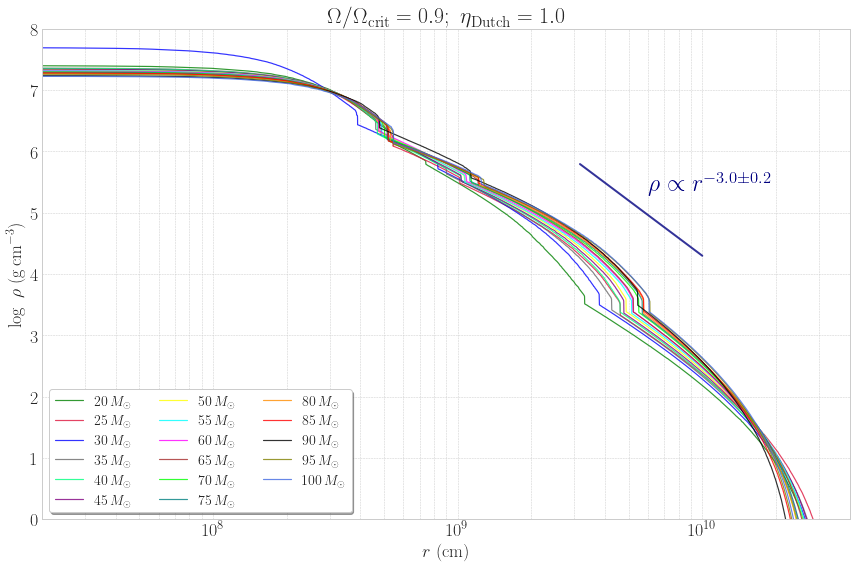

In [112]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import glob
import time
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

################################################################################
# EJEMPLO DE SCRIPT PARA GRAFICAR PERFILES DE DENSIDAD E INCLUIR LA RECTA
# DE MEJOR AJUSTE EN LA ESQUINA SUPERIOR DERECHA
################################################################################

# Registrar el inicio de la ejecución
start_time = time.time()

# Parámetros generales
rotation = 0.9
eta_d = 1.0

# Directorio base de las simulaciones
base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D{eta_d:.1f}/'
output_path = "/fs/phaethon/other0/gibran/sim_results/plots"  # Ruta de salida
os.makedirs(output_path, exist_ok=True)

# Rango de masas
masses = range(20, 105, 5)
simulations = [f'{mass}M_W{rotation}_D{eta_d:.1f}' for mass in masses]

# Unidades
R_sun_cm = 6.957e10  # 1 R_sun en cm

# Colores para cada simulación (opcional)
colors = [
    'green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple', 'yellow',
    'cyan', 'magenta', 'brown', 'lime', 'teal', 'darkorange', 'red', 'black',
    'olive', 'royalblue'
]

# RESULTADOS DEL AJUSTE (EJEMPLO)
# --------------------------------------------------------------------------
# Supongamos que ya obtuviste estos valores a partir del MCMC o de un ajuste
# lineal: log_rho = m_mcmc * log_r + b_mcmc
# donde m_mcmc y b_mcmc provienen del MCMC (p.ej., medianas de las cadenas)
# Si no los tienes aún, inserta aquí los valores que arrojó tu script de MCMC
m_mcmc = -2.99
b_mcmc = 34.2 # Ejemplo arbitrario
# --------------------------------------------------------------------------

# Iniciamos la figura
plt.figure(figsize=(12, 8))

for sim, color, mass in zip(simulations, colors, masses):
    logs_dir = os.path.join(base_path, sim)
    profile_files = glob.glob(os.path.join(logs_dir, 'profile*.data'))
    
    if profile_files:
        profile_file = profile_files[0]
        profile_data = mr.MesaData(profile_file)
        
        # Extraer radio (en cm) y log10(densidad)
        radius = profile_data.radius * R_sun_cm
        log_rho = profile_data.logRho
        
        plt.plot(radius, log_rho, label=rf'${mass}\,M_\odot$', color=color,
                 linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        print(f"Advertencia: No se encontró profile*.data en {logs_dir}")

# Escala logarítmica en eje X
plt.xscale('log')

# Etiquetas y límites
plt.xlabel(r'$r$ (cm)', fontsize=18)
plt.ylabel(r'$\log\ \rho\ (\mathrm{g\,cm^{-3}})$', fontsize=18)
plt.title(rf'$\Omega/\Omega_{{\rm crit}} = {rotation};\ \eta_{{\rm Dutch}} = {eta_d}$', fontsize=22)
plt.ylim(0, 8)
plt.xlim(2e7, 4e10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Leyenda
plt.legend(loc='lower left', fontsize=14, frameon=True, shadow=True, ncol=3)

################################################################################
# TRAZAR LA LÍNEA DE MEJOR AJUSTE
################################################################################
# Generamos puntos en el eje log(r) para trazar la recta
log_r_min, log_r_max = 9.5, 10  # Ajusta según rango deseado
log_r_vals = np.linspace(log_r_min, log_r_max, 100)
# Cálculo de log_rho con la ecuación ajustada
log_rho_fit = m_mcmc * log_r_vals + b_mcmc 
# Convertir log_r_vals a r (cm)
r_vals = 10**log_r_vals

# Graficar la línea de ajuste
plt.plot(r_vals, log_rho_fit, color="navy",  linewidth=2, alpha=0.8, label='Best fit')

# Insertar la ecuación de la recta en la esquina superior derecha
# Formato: log rho = m * log r + b
eq_text = r"$\rho \propto r^{-3.0 \pm 0.2}$"
plt.text(0.75, 0.67, eq_text,
         transform=plt.gca().transAxes,
         fontsize=24, color='navy',
         alpha=1.0)

################################################################################
# Guardar y mostrar
################################################################################
plot_name = f'Rho_R_MCMC_W{rotation}_D{eta_d}.pdf'
plt.tight_layout()
plt.savefig(os.path.join(output_path, plot_name), format='pdf')
plt.show()



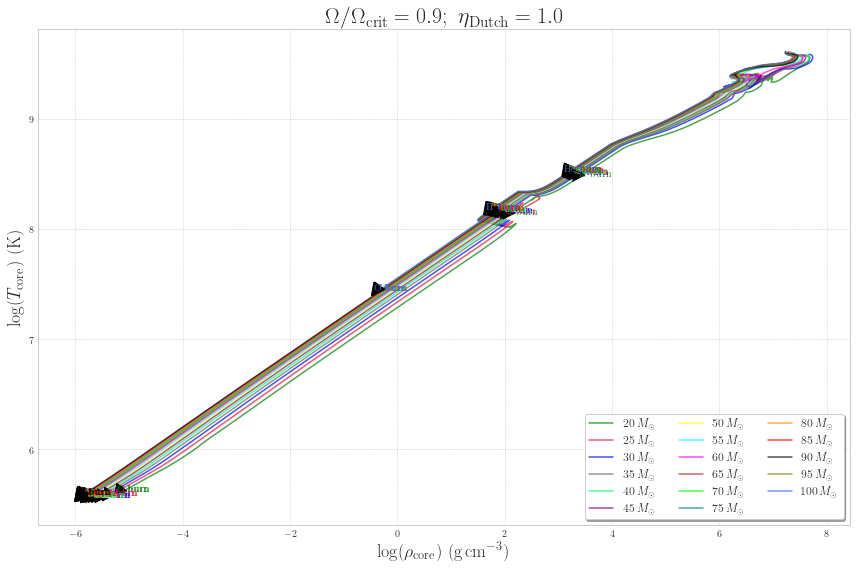


Script finalizado en 34.71 segundos.
Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D1.0/../plots/Tc_Rhoc_withBurningPhases_W0.9_D1.0.pdf


In [114]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import glob
import time
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

# ================================================================
# 1. Configuración inicial
# ================================================================
start_time = time.time()

rotation = 0.9
eta_d = 1.0

base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D{eta_d:.1f}/'
output_path = os.path.join(base_path, '../plots')
os.makedirs(output_path, exist_ok=True)

masses = range(20, 105, 5)
simulations = [f'{mass}M_W{rotation}_D{eta_d:.1f}' for mass in masses]

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Colores opcionales
colors = [
    'green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple', 'yellow',
    'cyan', 'magenta', 'brown', 'lime', 'teal', 'darkorange', 'red', 'black',
    'olive', 'royalblue'
]

# ================================================================
# 2. Función auxiliar para detectar fases de quemado
# ================================================================
def find_burn_end(history, species_center, threshold=1e-5):
    """
    Retorna el índice en el que la fracción de la especie (p.ej. center_h1)
    desciende por debajo de 'threshold'. Si no se encuentra, retorna None.
    """
    arr = getattr(history, species_center, None)
    if arr is None:
        return None
    
    below_threshold = np.where(arr < threshold)[0]
    if len(below_threshold) > 0:
        return below_threshold[0]  # Primer índice donde se cruza el umbral
    else:
        return None

# ================================================================
# 3. Graficar log(T_core) vs log(Rho_core) con anotaciones
# ================================================================
plt.figure(figsize=(12, 8))

for sim, color, mass in zip(simulations, colors, masses):
    history_path = os.path.join(base_path, sim, 'history.data')
    if os.path.exists(history_path):
        history = mr.MesaData(history_path)

        # log_center_Rho y log_center_T
        log_rho_c = history.log_center_Rho
        log_t_c   = history.log_center_T

        plt.plot(log_rho_c, log_t_c, label=fr'${mass}\,M_\odot$', 
                 color=color, linewidth=1.5, alpha=0.7)

        # ------------------------------------------------
        # Detectar momentos de final de quemado de H, He, C, O, Ne, Si
        # (puedes ajustar el umbral y el nombre de las columnas)
        # ------------------------------------------------
        burn_stages = {
            'H burn':  ('center_h1', 1e-2),
            'He burn': ('center_he4', 1e-2),
            'C burn':  ('center_c12', 1e-2),
            'Ne burn': ('center_ne20', 1e-2),
            'O burn':  ('center_o16', 1e-2),
            'Si burn': ('center_si28', 1e-2),
        }

        for stage_name, (species_center, thr) in burn_stages.items():
            idx = find_burn_end(history, species_center, threshold=thr)
            if idx is not None and idx < len(log_rho_c):
                x_val = log_rho_c[idx]
                y_val = log_t_c[idx]
                # Agregar anotación en la gráfica
                plt.annotate(stage_name,
                             xy=(x_val, y_val),
                             xytext=(x_val+0.05, y_val+0.05), # Desplaza el texto
                             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
                             fontsize=10, color=color)

    else:
        print(f"Advertencia: No se encontró {history_path}")


plt.xlabel(r'$\log (\rho_{\mathrm{core}})\ \mathrm{(g\,cm^{-3}})$', fontsize=18)
plt.ylabel(r'$\log (T_{\mathrm{core}})\ \mathrm{(K)}$', fontsize=18)
plt.title(rf'$\Omega/\Omega_{{\rm crit}} = {rotation};\ \eta_{{\rm Dutch}}={eta_d}$', fontsize=22)
plt.legend(loc='lower right', fontsize=12, ncol=3, frameon=True, shadow=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Guardar figura
plot_name = f'Tc_Rhoc_withBurningPhases_W{rotation}_D{eta_d}.pdf'
#plt.savefig(os.path.join(output_path, plot_name), format='pdf')
plt.show()

end_time = time.time()
print(f"\nScript finalizado en {end_time - start_time:.2f} segundos.")
print(f"Gráfico guardado en: {os.path.join(output_path, plot_name)}")


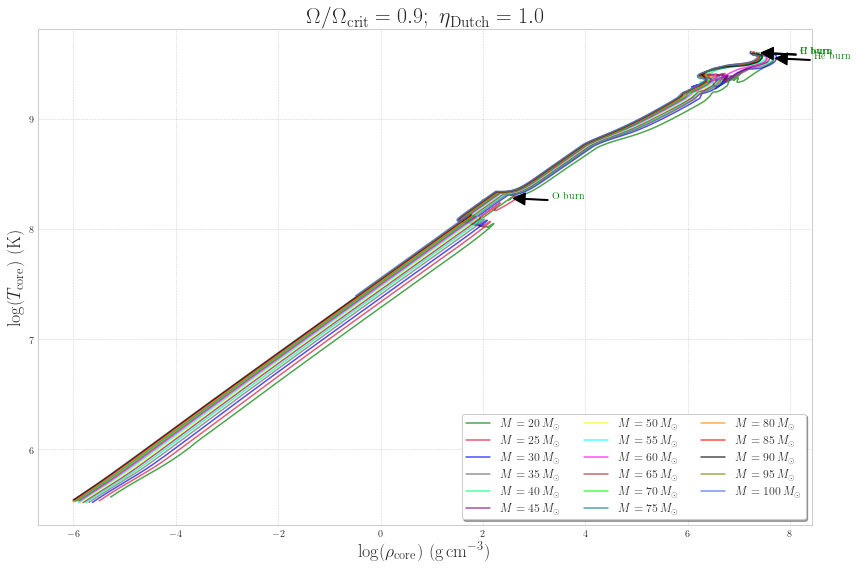


Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D1.0/../plots/Tc_Rhoc_withBurningPhases_Once_W0.9_D1.0.pdf
Script finalizado en 29.60 segundos.


In [131]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import glob
import time
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

# ================================================================
# 1. Configuración inicial
# ================================================================
start_time = time.time()

rotation = 0.9
eta_d = 1.0

base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D{eta_d:.1f}/'
output_path = os.path.join(base_path, '../plots')
os.makedirs(output_path, exist_ok=True)

masses = range(20, 105, 5)
simulations = [f'{mass}M_W{rotation}_D{eta_d:.1f}' for mass in masses]

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Colores opcionales
colors = [
    'green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple', 'yellow',
    'cyan', 'magenta', 'brown', 'lime', 'teal', 'darkorange', 'red', 'black',
    'olive', 'royalblue'
]

# ================================================================
# 2. Función auxiliar para detectar fases de quemado
# ================================================================
def find_burn_end(history, species_center, threshold=1e-5):
    """
    Retorna el índice en el que la fracción de la especie (p.ej. center_h1)
    desciende por debajo de 'threshold'. Si no se encuentra, retorna None.
    """
    arr = getattr(history, species_center, None)
    if arr is None:
        return None
    
    below_threshold = np.where(arr < threshold)[0]
    if len(below_threshold) > 0:
        return below_threshold[-1]  # Primer índice donde se cruza el umbral
    else:
        return None

# ================================================================
# 3. Graficar log(T_core) vs log(Rho_core) con anotaciones
# ================================================================
plt.figure(figsize=(12, 8))

# Definir las fases de quemado y sus columnas en history.data
burn_stages = {
    'H burn':  ('center_h1', 1e-6),
    'He burn': ('center_he4', 1e-6),
    'C burn':  ('center_c12', 1e-6),
    'Ne burn': ('center_ne20', 1e-6),
    'O burn':  ('center_o16', 1e-6),
    'Si burn': ('center_si28', 1e-6),
}

# Para evitar múltiples anotaciones de la misma fase en cada corrida
stages_annotated = set()  

for sim, color, mass in zip(simulations, colors, masses):
    history_path = os.path.join(base_path, sim, 'history.data')
    if os.path.exists(history_path):
        history = mr.MesaData(history_path)

        # Ejes logarítmicos
        log_rho_c = history.log_center_Rho
        log_t_c   = history.log_center_T

        plt.plot(log_rho_c, log_t_c, label=fr'$M={mass}\,M_\odot$', 
                 color=color, linewidth=1.5, alpha=0.7)

        # Buscar final de quemado para cada especie
        for stage_name, (species_center, thr) in burn_stages.items():
            idx = find_burn_end(history, species_center, threshold=thr)
            # Anotar solo si:
            # 1) se encontró un índice válido
            # 2) todavía no se ha anotado esta fase (stage_name) en todo el plot
            if idx is not None and idx < len(log_rho_c) and stage_name not in stages_annotated:
                x_val = log_rho_c[idx]
                y_val = log_t_c[idx]
                # Anotar y desplazar a la derecha, por ejemplo +0.2 en x
                plt.annotate(
                    stage_name,
                    xy=(x_val, y_val),
                    xytext=(x_val + 0.8, y_val),  # Ajusta según necesites
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1),
                    fontsize=10, color=color,
                    ha='left'
                )
                # Marcar que esta fase ya fue anotada
                stages_annotated.add(stage_name)
    else:
        print(f"Advertencia: No se encontró {history_path}")


plt.xlabel(r'$\log (\rho_{\mathrm{core}})\ \mathrm{(g\,cm^{-3}})$', fontsize=18)
plt.ylabel(r'$\log (T_{\mathrm{core}})\ \mathrm{(K)}$', fontsize=18)
plt.title(rf'$\Omega/\Omega_{{\rm crit}} = {rotation};\ \eta_{{\rm Dutch}}={eta_d}$', fontsize=22)
plt.legend(loc='lower right', fontsize=12, ncol=3, frameon=True, shadow=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Guardar figura
plot_name = f'Tc_Rhoc_withBurningPhases_Once_W{rotation}_D{eta_d}.pdf'
#plt.savefig(os.path.join(output_path, plot_name), format='pdf')
plt.show()

print(f"\nGráfico guardado en: {os.path.join(output_path, plot_name)}")
print(f"Script finalizado en {time.time() - start_time:.2f} segundos.")


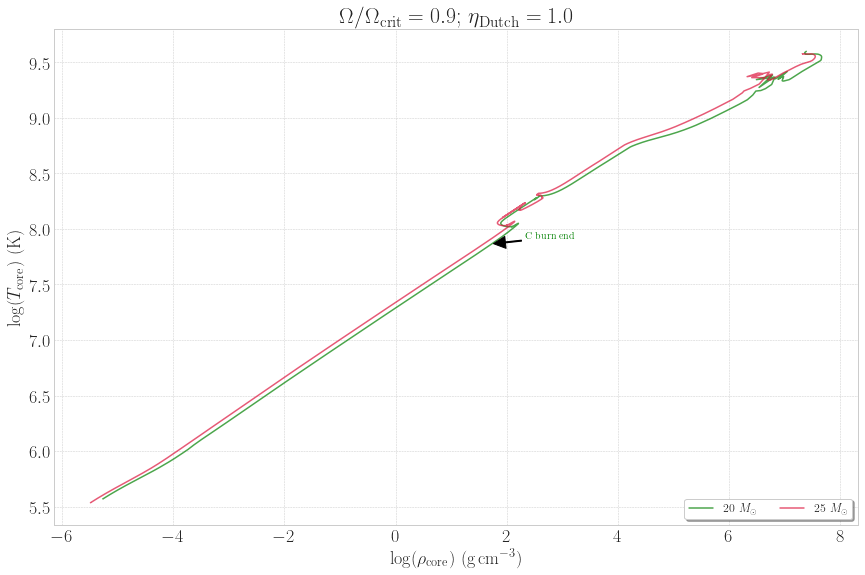


Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D1.0/../plots/Tc_Rhoc_CarbonBurn_W0.9_D1.0.pdf
Script finalizado en 3.72 segundos.


In [141]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import glob
import time
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

# ================================================================
# 1. Configuración inicial
# ================================================================
start_time = time.time()

rotation = 0.9
eta_d = 1.0

base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D{eta_d:.1f}/'
output_path = os.path.join(base_path, '../plots')
os.makedirs(output_path, exist_ok=True)

masses = range(20, 30, 5)
simulations = [f'{mass}M_W{rotation}_D{eta_d:.1f}' for mass in masses]

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Colores opcionales
colors = [
    'green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple', 'yellow',
    'cyan', 'magenta', 'brown', 'lime', 'teal', 'darkorange', 'red', 'black',
    'olive', 'royalblue'
]

################################################################################
# Función auxiliar para detectar el final de la quema de carbono
################################################################################
def find_carbon_burn_end(history, threshold=1e-20):
    """
    Retorna el índice en el que la fracción central de c12
    baja por debajo de 'threshold'. Si no se encuentra, retorna None.
    """
    c12 = getattr(history, 'center_c12', None)
    if c12 is None:
        return None
    
    idx_below = np.where(c12 < threshold)[0]
    if len(idx_below) > 0:
        return idx_below[-1]  # Primer índice donde se cruza el umbral
    else:
        return None

################################################################################
# Gráfico principal log(T_core) vs. log(Rho_core)
################################################################################
plt.figure(figsize=(12, 8))

# Para evitar múltiples anotaciones
carbon_burn_annotated = False

for sim, color, mass in zip(simulations, colors, masses):
    history_path = os.path.join(base_path, sim, 'history.data')
    if os.path.exists(history_path):
        history = mr.MesaData(history_path)

        log_rho_c = history.log_center_Rho
        log_t_c   = history.log_center_T

        plt.plot(log_rho_c, log_t_c, label=fr'{mass} $M_\odot$',
                 color=color, linewidth=1.5, alpha=0.7)

        # Detectar final de quemado de carbono
        idx = find_carbon_burn_end(history, threshold=1e-20)
        # Si se encuentra un índice y aún no se ha anotado
        if idx is not None and idx < len(log_rho_c) and not carbon_burn_annotated:
            x_val = log_rho_c[idx]
            y_val = log_t_c[idx]
            # Anotar la fase
            plt.annotate(
                'C burn end',
                xy=(x_val, y_val),
                xytext=(x_val + 0.6, y_val + 0.05),  # Ajusta según tu escala
                arrowprops=dict(facecolor='black', shrink=0.05, width=1),
                fontsize=10, color=color,
                ha='left'
            )
            carbon_burn_annotated = True  # Evita más anotaciones
    else:
        print(f"Advertencia: No se encontró {history_path}")

# Ajustes de ejes
plt.xlabel(r'$\log (\rho_{\mathrm{core}})\ \mathrm{(g\,cm^{-3}})$', fontsize=18)
plt.ylabel(r'$\log (T_{\mathrm{core}})\ \mathrm{(K)}$', fontsize=18)
plt.title(rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$', fontsize=22)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=12, ncol=3, frameon=True, shadow=True)
plt.tight_layout()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plot_name = f'Tc_Rhoc_CarbonBurn_W{rotation}_D{eta_d}.pdf'
#plt.savefig(os.path.join(output_path, plot_name), format='pdf')
plt.show()

print(f"\nGráfico guardado en: {os.path.join(output_path, plot_name)}")
print(f"Script finalizado en {time.time() - start_time:.2f} segundos.")


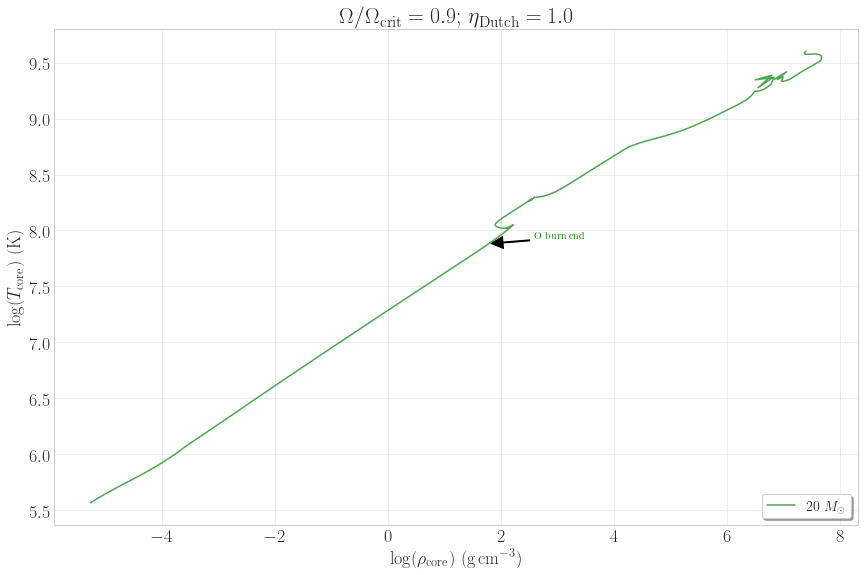


Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D1.0/../plots/Tc_Rhoc_OxygenBurn_W0.9_D1.0.pdf
Script finalizado en 1.94 segundos.


In [142]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import glob
import time
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

# ================================================================
# 1. Configuración inicial
# ================================================================
start_time = time.time()

rotation = 0.9
eta_d = 1.0

base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D{eta_d:.1f}/'
output_path = os.path.join(base_path, '../plots')
os.makedirs(output_path, exist_ok=True)

masses = range(20, 25, 5)
simulations = [f'{mass}M_W{rotation}_D{eta_d:.1f}' for mass in masses]

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Colores opcionales
colors = [
    'green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple', 'yellow',
    'cyan', 'magenta', 'brown', 'lime', 'teal', 'darkorange', 'red', 'black',
    'olive', 'royalblue'
]

################################################################################
# Función auxiliar para detectar el final de la quema de oxígeno
################################################################################
def find_oxygen_burn_end(history, threshold=1e-20):
    """
    Retorna el índice en el que la fracción central de o16
    baja por debajo de 'threshold'. Si no se encuentra, retorna None.
    
    Ajusta 'threshold' según tu criterio. Aquí usamos 1e-3 como ejemplo.
    """
    o16 = getattr(history, 'center_o16', None)
    if o16 is None:
        return None
    
    idx_below = np.where(o16 < threshold)[0]
    if len(idx_below) > 0:
        return idx_below[-1]  # Primer índice donde se cruza el umbral
    else:
        return None

################################################################################
# Gráfico principal log(T_core) vs. log(Rho_core)
################################################################################
plt.figure(figsize=(12, 8))

# Para evitar múltiples anotaciones de O burn
oxygen_burn_annotated = False

for sim, color, mass in zip(simulations, colors, masses):
    history_path = os.path.join(base_path, sim, 'history.data')
    if os.path.exists(history_path):
        history = mr.MesaData(history_path)

        log_rho_c = history.log_center_Rho
        log_t_c   = history.log_center_T

        plt.plot(log_rho_c, log_t_c, label=fr'{mass} $M_\odot$',
                 color=color, linewidth=1.5, alpha=0.7)

        # Detectar final de quemado de oxígeno
        idx = find_oxygen_burn_end(history, threshold=1e-20)
        # Si se encuentra un índice y aún no se ha anotado
        if idx is not None and idx < len(log_rho_c) and not oxygen_burn_annotated:
            x_val = log_rho_c[idx]
            y_val = log_t_c[idx]
            # Anotar la fase
            plt.annotate(
                'O burn end',
                xy=(x_val, y_val),
                xytext=(x_val + 0.8, y_val + 0.05),  # Ajusta según tu escala
                arrowprops=dict(facecolor='black', shrink=0.05, width=1),
                fontsize=10, color=color,
                ha='left'
            )
            oxygen_burn_annotated = True  # Evita más anotaciones
    else:
        print(f"Advertencia: No se encontró {history_path}")

# Ajustes de ejes
plt.xlabel(r'$\log (\rho_{\mathrm{core}})\ \mathrm{(g\,cm^{-3}})$', fontsize=18)
plt.ylabel(r'$\log (T_{\mathrm{core}})\ \mathrm{(K)}$', fontsize=18)
plt.title(rf'$\Omega/\Omega_{{\rm crit}} = {rotation}$; $\eta_{{\rm Dutch}}={eta_d}$', fontsize=22)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=14, ncol=3, frameon=True, shadow=True)
plt.tight_layout()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plot_name = f'Tc_Rhoc_OxygenBurn_W{rotation}_D{eta_d}.pdf'
#plt.savefig(os.path.join(output_path, plot_name), format='pdf')
plt.show()

print(f"\nGráfico guardado en: {os.path.join(output_path, plot_name)}")
print(f"Script finalizado en {time.time() - start_time:.2f} segundos.")


In [144]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import numpy as np
import mesa_reader as mr

# =============================================================================
# Criterios (letras c a k)
# =============================================================================
# c) 40% central hydrogen mass fraction
# d) 1% hydrogen left in the core
# e) 1% helium burn
# f) 50% central helium mass fraction
# g) 1% helium left in the core
# h) central temperature of 5 x 10^8 K
# i) central temperature of 1.2 x 10^9 K
# j) central oxygen mass fraction drops below 5%
# k) central Si mass fraction drops below 1e-4
#
# Ajusta los nombres de columna y los umbrales de acuerdo a tus datos.

CRITERIA = {
    'c': {
        'description': "40% central hydrogen mass fraction",
        'column': 'center_h1',
        'threshold': 0.40,
        'condition': 'below',  # o 'above', según el caso
    },
    'd': {
        'description': "1% hydrogen left in the core",
        'column': 'center_h1',
        'threshold': 0.01,
        'condition': 'below',
    },
    'e': {
        'description': "1% helium burn",
        'column': 'center_he4',
        'threshold': 0.01,
        'condition': 'below',
    },
    'f': {
        'description': "50% central helium mass fraction",
        'column': 'center_he4',
        'threshold': 0.50,
        'condition': 'below',  # o 'above', revisa si quieres "arriba" o "abajo"
    },
    'g': {
        'description': "1% helium left in the core",
        'column': 'center_he4',
        'threshold': 0.01,
        'condition': 'below',
    },
    'h': {
        'description': "central temperature of 5 x 10^8 K",
        'column': 'log_center_T',
        'threshold': np.log10(5e8),
        'condition': 'above',
    },
    'i': {
        'description': "central temperature of 1.2 x 10^9 K",
        'column': 'log_center_T',
        'threshold': np.log10(1.2e9),
        'condition': 'above',
    },
    'j': {
        'description': "central oxygen mass fraction drops below 5%",
        'column': 'center_o16',
        'threshold': 0.05,
        'condition': 'below',
    },
    'k': {
        'description': "central Si mass fraction drops below 1e-4",
        'column': 'center_si28',
        'threshold': 1e-4,
        'condition': 'below',
    },
}

def find_index_for_criterion(history, column_name, threshold, condition='below'):
    """
    Retorna el primer índice donde la columna 'column_name' cumple
    la condición con el 'threshold'.
    - condition='below': primer índice donde column < threshold
    - condition='above': primer índice donde column > threshold
    Si no se encuentra, retorna None.
    """
    if not hasattr(history, column_name):
        return None
    
    data = getattr(history, column_name)
    
    if condition == 'below':
        idx = np.where(data < threshold)[0]
    else:  # condition == 'above'
        idx = np.where(data > threshold)[0]
    
    if len(idx) > 0:
        return idx[0]
    else:
        return None

# =============================================================================
# Ajusta la ruta donde se encuentren tus history.data (o ejecuta en su directorio).
# =============================================================================
BASE_DIR = "/ruta/a/tus/simulaciones/"
SIMULATIONS = ["20M_W0.9_D1.0", "25M_W0.9_D1.0", "30M_W0.9_D1.0"]  # etc.

def main():
    for sim in SIMULATIONS:
        history_path = os.path.join(BASE_DIR, sim, "history.data")
        if not os.path.exists(history_path):
            print(f"Advertencia: No existe {history_path}")
            continue
        
        print(f"\n=== Simulación: {sim} ===")
        history = mr.MesaData(history_path)
        
        # Recorremos los criterios c..k
        for letter, info in CRITERIA.items():
            column = info['column']
            threshold = info['threshold']
            cond = info['condition']
            
            idx = find_index_for_criterion(history, column, threshold, cond)
            if idx is not None:
                # Extraer log_center_T en ese idx
                log_tc_value = history.log_center_T[idx]
                print(f" Letra {letter}: {info['description']}")
                print(f"   -> index = {idx}, log T_core = {log_tc_value:.4f}\n")
            else:
                print(f" Letra {letter}: {info['description']} no se cumplió en {sim}\n")

if __name__ == "__main__":
    main()


Advertencia: No existe /ruta/a/tus/simulaciones/20M_W0.9_D1.0/history.data
Advertencia: No existe /ruta/a/tus/simulaciones/25M_W0.9_D1.0/history.data
Advertencia: No existe /ruta/a/tus/simulaciones/30M_W0.9_D1.0/history.data


In [146]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import glob
import time
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

# ================================================================
# 1. Configuración inicial
# ================================================================
start_time = time.time()

rotation = 0.9
eta_d = 1.0

base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D{eta_d:.1f}/'
output_path = os.path.join(base_path, '../plots')
os.makedirs(output_path, exist_ok=True)

masses = range(20, 35, 5)
simulations = [f'{mass}M_W{rotation}_D{eta_d:.1f}' for mass in masses]

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

colors = [
    'green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple', 'yellow',
    'cyan', 'magenta', 'brown', 'lime', 'teal', 'darkorange', 'red', 'black',
    'olive', 'royalblue'
]

# ================================================================
# 2. Definir criterios c..k (Ejemplo)
# ================================================================
# Basado en la tabla que muestras, ajusta los umbrales y condiciones
# a tus necesidades o a las definiciones exactas que Paxton menciona.
CRITERIA = {
    'c': {
        'description': "40% central hydrogen mass fraction",
        'column': 'center_h1',
        'threshold': 0.40,
        'condition': 'below',  # 'below' o 'above'
    },
    'd': {
        'description': "1% hydrogen left in the core",
        'column': 'center_h1',
        'threshold': 0.01,
        'condition': 'below',
    },
    'e': {
        'description': "1% helium burn",
        'column': 'center_he4',
        'threshold': 0.01,
        'condition': 'below',
    },
    'f': {
        'description': "50% central helium mass fraction",
        'column': 'center_he4',
        'threshold': 0.50,
        'condition': 'below',  # o 'above'
    },
    'g': {
        'description': "1% helium left in the core",
        'column': 'center_he4',
        'threshold': 0.01,
        'condition': 'below',
    },
    'h': {
        'description': "central temperature of 5 x 10^8 K",
        'column': 'log_center_T',
        'threshold': np.log10(5e8),
        'condition': 'above',
    },
    'i': {
        'description': "central temperature of 1.2 x 10^9 K",
        'column': 'log_center_T',
        'threshold': np.log10(1.2e9),
        'condition': 'above',
    },
    'j': {
        'description': "central oxygen mass fraction drops below 5%",
        'column': 'center_o16',
        'threshold': 0.05,
        'condition': 'below',
    },
    'k': {
        'description': "central Si mass fraction drops below 1e-4",
        'column': 'center_si28',
        'threshold': 1e-4,
        'condition': 'below',
    },
}


# ================================================================
# 3. Función para encontrar el índice donde se cumple el criterio
# ================================================================
def find_index_for_criterion(history, column_name, threshold, condition='below'):
    """
    Retorna el primer índice donde la columna 'column_name' cumple
    la condición con el 'threshold'.
    - condition='below': primer índice donde column < threshold
    - condition='above': primer índice donde column > threshold
    Si no se encuentra, retorna None.
    """
    if not hasattr(history, column_name):
        return None
    
    data = getattr(history, column_name)
    
    if condition == 'below':
        idx = np.where(data < threshold)[0]
    else:  # condition == 'above'
        idx = np.where(data > threshold)[0]
    
    if len(idx) > 0:
        return idx[0]
    else:
        return None

# ================================================================
# 4. Bucle principal: leer cada simulación y extraer criterios
# ================================================================
def main():
    for sim in simulations:
        history_path = os.path.join(base_path, sim, "history.data")
        if not os.path.exists(history_path):
            print(f"\n[WARNING] No se encontró {history_path} para {sim}")
            continue
        
        # Cargar los datos con mesa_reader
        history = mr.MesaData(history_path)
        
        print(f"\n=== Resultados para la simulación: {sim} ===")
        
        # Revisar cada criterio c..k
        for letter, info in CRITERIA.items():
            column = info['column']
            threshold = info['threshold']
            cond = info['condition']
            
            idx = find_index_for_criterion(history, column, threshold, cond)
            if idx is not None:
                # Extraer log_center_T en ese idx
                log_tc_value = history.log_center_T[idx]
                print(f" Letra {letter} -> {info['description']}")
                print(f"   Indice = {idx}, log T_core = {log_tc_value:.4f}")
            else:
                print(f" Letra {letter} -> {info['description']} NO se cumplió.")

def plot_example():
    """
    Opcional: Si quieres hacer un plot, puedes reusar parte de tu código
    para graficar log_rho_core vs log_T_core, pero aquí solo mostramos
    un ejemplo de lectura e impresión.
    """
    pass

if __name__ == "__main__":
    main()
    end_time = time.time()
    print(f"\nScript finalizado en {end_time - start_time:.2f} segundos.")



=== Resultados para la simulación: 20M_W0.9_D1.0 ===
 Letra c -> 40% central hydrogen mass fraction
   Indice = 650, log T_core = 8.0241
 Letra d -> 1% hydrogen left in the core
   Indice = 909, log T_core = 8.0893
 Letra e -> 1% helium burn
   Indice = 1583, log T_core = 8.4341
 Letra f -> 50% central helium mass fraction
   Indice = 0, log T_core = 5.5689
 Letra g -> 1% helium left in the core
   Indice = 1583, log T_core = 8.4341
 Letra h -> central temperature of 5 x 10^8 K
   Indice = 2010, log T_core = 8.6998
 Letra i -> central temperature of 1.2 x 10^9 K
   Indice = 2084, log T_core = 9.0952
 Letra j -> central oxygen mass fraction drops below 5%
   Indice = 0, log T_core = 5.5689
 Letra k -> central Si mass fraction drops below 1e-4 NO se cumplió.

=== Resultados para la simulación: 25M_W0.9_D1.0 ===
 Letra c -> 40% central hydrogen mass fraction
   Indice = 647, log T_core = 8.0332
 Letra d -> 1% hydrogen left in the core
   Indice = 844, log T_core = 8.0957
 Letra e -> 1% h

In [163]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import numpy as np
import mesa_reader as mr
import time

# ================================================================
# 1. Configuración inicial
# ================================================================
start_time = time.time()

rotation = 0.9
eta_d = 1.0

base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D{eta_d:.1f}/'
output_path = os.path.join(base_path, '../plots')
os.makedirs(output_path, exist_ok=True)

masses = range(20, 105, 5)
simulations = [f'{mass}M_W{rotation}_D{eta_d:.1f}' for mass in masses]

# Lista de isótopos definidos en history.data (se accede como center_h1, center_he4, etc.)
isotopes = ['h1', 'he4', 'c12', 'o16', 'c13', 'n14', 'ne22']
# Umbral del 1% en fracción de masa
THRESHOLD = 0.01

def find_index_below_threshold(history, column_name, threshold=THRESHOLD):
    """
    Retorna el primer índice donde la columna 'column_name' de history.data 
    es menor que 'threshold'. Si no se encuentra, retorna None.
    """
    if not hasattr(history, column_name):
        return None
    data = getattr(history, column_name)
    idx = np.where(data < threshold)[0]
    return idx[0] if len(idx) > 0 else None

def main():
    for sim in simulations:
        history_path = os.path.join(base_path, sim, "history.data")
        if not os.path.exists(history_path):
            print(f"\n[WARNING] No se encontró {history_path} para la simulación {sim}")
            continue

        print(f"\n=== Análisis para la simulación: {sim} ===")
        history = mr.MesaData(history_path)

        # Iterar sobre cada isótopo en la lista
        for iso in isotopes:
            col_name = f"center_{iso}"
            idx = find_index_below_threshold(history, col_name, THRESHOLD)
            if idx is not None:
                logT_core = history.log_center_T[idx]
                print(f"  Isótopo {iso}: cruza el umbral de 1% en model = {history.model_number[idx]}, logT_core = {logT_core:.4f}")
            else:
                print(f"  Isótopo {iso}: nunca cruza el umbral de 1% en {sim}")

if __name__ == "__main__":
    main()
    end_time = time.time()
    print(f"\nScript finalizado en {end_time - start_time:.2f} segundos.")



=== Análisis para la simulación: 20M_W0.9_D1.0 ===
  Isótopo h1: cruza el umbral de 1% en model = 910, logT_core = 8.0893
  Isótopo he4: cruza el umbral de 1% en model = 1584, logT_core = 8.4341
  Isótopo c12: cruza el umbral de 1% en model = 1, logT_core = 5.5689
  Isótopo o16: cruza el umbral de 1% en model = 1, logT_core = 5.5689
  Isótopo c13: nunca cruza el umbral de 1% en 20M_W0.9_D1.0
  Isótopo n14: nunca cruza el umbral de 1% en 20M_W0.9_D1.0
  Isótopo ne22: nunca cruza el umbral de 1% en 20M_W0.9_D1.0

=== Análisis para la simulación: 25M_W0.9_D1.0 ===
  Isótopo h1: cruza el umbral de 1% en model = 845, logT_core = 8.0957
  Isótopo he4: cruza el umbral de 1% en model = 2609, logT_core = 8.4533
  Isótopo c12: cruza el umbral de 1% en model = 1, logT_core = 5.5344
  Isótopo o16: cruza el umbral de 1% en model = 1, logT_core = 5.5344
  Isótopo c13: nunca cruza el umbral de 1% en 25M_W0.9_D1.0
  Isótopo n14: nunca cruza el umbral de 1% en 25M_W0.9_D1.0
  Isótopo ne22: nunca cruza

  Isótopo h1: cruza el umbral de 1% en model = 729, logT_core = 8.1297
  Isótopo he4: cruza el umbral de 1% en model = 1722, logT_core = 8.4774
  Isótopo c12: cruza el umbral de 1% en model = 1, logT_core = 7.3962
  Isótopo o16: cruza el umbral de 1% en model = 1, logT_core = 7.3962
  Isótopo c13: nunca cruza el umbral de 1% en 100M_W0.9_D1.0
  Isótopo n14: nunca cruza el umbral de 1% en 100M_W0.9_D1.0
  Isótopo ne22: nunca cruza el umbral de 1% en 100M_W0.9_D1.0

Script finalizado en 30.43 segundos.


In [179]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import numpy as np
import mesa_reader as mr

# Umbral de 1% para la masa fraccional
THRESHOLD = 0.01
# Ignorar los primeros modelos (por ejemplo, los que tengan model_number < 900)
MIN_MODEL_NUMBER = 200

def find_crossing_index(history, column_name, threshold, condition='below'):
    """
    Retorna el primer índice (ignorando los modelos con model_number < MIN_MODEL_NUMBER)
    donde la columna 'column_name' cambia de estar por encima a estar por debajo del umbral.
    
    - condition='below': se busca el primer cruce donde el valor pasa de >= threshold a < threshold.
    - condition='above': se busca el primer cruce donde el valor pasa de <= threshold a > threshold.
    
    Si no se encuentra ningún cruce, retorna None.
    """
    if not hasattr(history, column_name):
        return None
    
    data = getattr(history, column_name)
    model_numbers = history.model_number
    
    # Filtrar solo los índices con model_number >= MIN_MODEL_NUMBER
    valid_indices = np.where(model_numbers >= MIN_MODEL_NUMBER)[0]
    if len(valid_indices) == 0:
        return None
    valid_data = data[valid_indices]
    
    if condition == 'below':
        for i in range(1, len(valid_data)):
            if valid_data[i-1] >= threshold and valid_data[i] < threshold:
                return valid_indices[i]
    else:  # condition == 'above'
        for i in range(1, len(valid_data)):
            if valid_data[i-1] <= threshold and valid_data[i] > threshold:
                return valid_indices[i]
    
    return None

def main():
    
    rotation = 0.9
    eta_d = 1.0
    base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D{eta_d:.1f}/'
    
    masses = range(20, 105, 5)
    simulations = [f'{mass}M_W{rotation}_D{eta_d:.1f}' for mass in masses]
    isotopes = ['h1', 'he4', 'c12', 'o16', 'c13', 'n14', 'ne22']
    
    for sim in simulations:
        history_path = os.path.join(base_path, sim, "history.data")
        if not os.path.exists(history_path):
            print(f"\n[WARNING] No se encontró {history_path} para la simulación {sim}")
            continue
        
        print(f"\n=== Análisis para la simulación: {sim} ===")
        history = mr.MesaData(history_path)
        
        for iso in isotopes:
            col_name = f"center_{iso}"
            idx = find_crossing_index(history, col_name, THRESHOLD, condition='below')
            if idx is not None:
                logT_core = history.log_center_T[idx]
                print(f"Isótopo {iso}: cruza el umbral de 1% en model = {history.model_number[idx]}, log(T_core) = {logT_core:.4f}")
            else:
                print(f"Isótopo {iso}: no se encontró cruce del umbral de 1% en {sim}")

if __name__ == "__main__":
    main()



=== Análisis para la simulación: 20M_W0.9_D1.0 ===
Isótopo h1: cruza el umbral de 1% en model = 910, log(T_core) = 8.0893
Isótopo he4: cruza el umbral de 1% en model = 1584, log(T_core) = 8.4341
Isótopo c12: cruza el umbral de 1% en model = 2003, log(T_core) = 8.6852
Isótopo o16: cruza el umbral de 1% en model = 2096, log(T_core) = 9.2743
Isótopo c13: no se encontró cruce del umbral de 1% en 20M_W0.9_D1.0
Isótopo n14: no se encontró cruce del umbral de 1% en 20M_W0.9_D1.0
Isótopo ne22: no se encontró cruce del umbral de 1% en 20M_W0.9_D1.0

=== Análisis para la simulación: 25M_W0.9_D1.0 ===
Isótopo h1: cruza el umbral de 1% en model = 845, log(T_core) = 8.0957
Isótopo he4: cruza el umbral de 1% en model = 2609, log(T_core) = 8.4533
Isótopo c12: cruza el umbral de 1% en model = 3005, log(T_core) = 8.7055
Isótopo o16: cruza el umbral de 1% en model = 3081, log(T_core) = 9.3718
Isótopo c13: no se encontró cruce del umbral de 1% en 25M_W0.9_D1.0
Isótopo n14: no se encontró cruce del umbra

Isótopo h1: cruza el umbral de 1% en model = 721, log(T_core) = 8.1291
Isótopo he4: cruza el umbral de 1% en model = 1668, log(T_core) = 8.4761
Isótopo c12: cruza el umbral de 1% en model = 2066, log(T_core) = 8.7259
Isótopo o16: cruza el umbral de 1% en model = 2582, log(T_core) = 9.4421
Isótopo c13: no se encontró cruce del umbral de 1% en 95M_W0.9_D1.0
Isótopo n14: no se encontró cruce del umbral de 1% en 95M_W0.9_D1.0
Isótopo ne22: no se encontró cruce del umbral de 1% en 95M_W0.9_D1.0

=== Análisis para la simulación: 100M_W0.9_D1.0 ===
Isótopo h1: cruza el umbral de 1% en model = 729, log(T_core) = 8.1297
Isótopo he4: cruza el umbral de 1% en model = 1722, log(T_core) = 8.4774
Isótopo c12: cruza el umbral de 1% en model = 2119, log(T_core) = 8.7269
Isótopo o16: cruza el umbral de 1% en model = 3002, log(T_core) = 9.4430
Isótopo c13: no se encontró cruce del umbral de 1% en 100M_W0.9_D1.0
Isótopo n14: no se encontró cruce del umbral de 1% en 100M_W0.9_D1.0
Isótopo ne22: no se enco

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


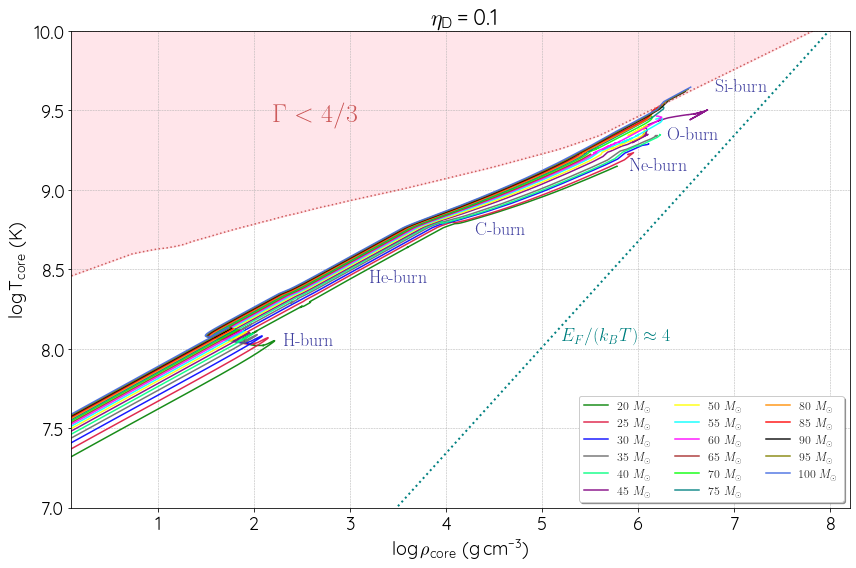


Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/../plots/Tc_Rhoc_W0.9_D0.1.pdf


In [20]:
# ================================================================
# 1. Configuración inicial
# ================================================================

rotation = 0.9
eta_d = 0.1

base_path = f'/fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D{eta_d:.1f}/'
output_path = os.path.join(base_path, '../plots')
os.makedirs(output_path, exist_ok=True)

masses = range(20, 105, 5)
simulations = [f'{mass}M_W{rotation}_D{eta_d:.1f}' for mass in masses]


colors = [
    'green', 'crimson', 'blue', 'dimgrey', 'springgreen', 'purple', 'yellow',
    'cyan', 'magenta', 'brown', 'lime', 'teal', 'darkorange', 'red', 'black',
    'olive', 'royalblue'
]

# ================================================================
# 2. Interpolación de la línea \Gamma = 4/3 (opcional)
# ================================================================
def gamma_interpolated():
    gamma_data = np.array([
        [0.7006687633820481, 8.590361734212374],
        [0.7406210974303346, 8.59912053097071],
        [0.7668218336623823, 8.60238956213661],
        [0.7963237252738782, 8.604791013394294],
        [0.8239676504762193, 8.608559864412078],
        [0.854391559337749, 8.612020838255967],
        [0.8831090079107848, 8.616103536354132],
        [0.928500053857564, 8.620516306308115],
        [0.9556233115667899, 8.62241516385847],
        [0.9930241373396642, 8.62806841889161],
        [1.045178733313484, 8.63123924285909],
        [1.0840017428183175, 8.634147279779766],
        [1.115429572575449, 8.636923769157175],
        [1.159084835691005, 8.642586536704426],
        [1.220221327679386, 8.64738948845892],
        [1.2542602092694146, 8.65329913547712],
        [1.343569782107448, 8.672795961282233],
        [1.3950376913438516, 8.682878028680562],
        [1.4484771734129014, 8.691210885054108],
        [1.4979612928603598, 8.697565366473723],
        [1.567833217228917, 8.713198464040786],
        [1.6287601900782025, 8.722696872583056],
        [1.7024622466239647, 8.7355291782133],
        [1.7753293139935402, 8.74818819934191],
        [1.8550701018603537, 8.760772448382957],
        [1.9293184086879398, 8.773370243468937],
        [1.9945912144321303, 8.782421162966724],
        [2.084291515389673, 8.798046079545427],
        [2.157221559890761, 8.80811130432585],
        [2.2524333830464345, 8.824419600830469],
        [2.3462111357563886, 8.839316625537075],
        [2.450940161809495, 8.85241599554133],
        [2.554480384808679, 8.86951042998573],
        [2.7059027032556093, 8.89205650299771],
        [2.8304580274055464, 8.908070829227034],
        [2.946886723652477, 8.925529996259021],
        [3.073999685177946, 8.942637054401812],
        [3.5477249725462996, 9.005395514673028],
        [5.603235400092118, 9.343271151313758],
        [5.7806385229261075, 9.397405946619989],
        [5.893930028557216, 9.430938675806587],
        [4.466222542022773, 9.139701909751727],
        [5.184185251205373, 9.256595136072756]
    ])
    log_rhoc = gamma_data[:, 0]
    log_tc = gamma_data[:, 1]
    gamma_interp = interp1d(log_rhoc, log_tc, kind='linear', bounds_error=False, fill_value='extrapolate')
    return gamma_interp

gamma_interp = gamma_interpolated()

# ================================================================
# 3B. Línea E_F/(k_B T) = 4 (gas de electrones no relativista)
# ================================================================
# Constantes en CGS
h   = 6.62607015e-27      # erg s (Planck)
hbar= h/(2.0*np.pi)
m_e = 9.10938356e-28      # g (masa del electrón)
m_u = 1.66053906660e-24   # g (masa atómica unificada)
k_B = 1.380649e-16        # erg/K (Boltzmann)
Y_e = 0.5                 # fracción electrónica

def T_fermi_4(rho):
    """
    Retorna T (K) tal que E_F = 4 k_B T para un gas de electrones no relativista
    con fracción electrónica Y_e. rho en g/cm^3.
    """
    n_e = (Y_e * rho) / m_u
    e_f = (hbar**2/(2.0*m_e)) * (3.0*np.pi**2 * n_e)**(2.0/3.0)
    T = e_f / (4.0 * k_B)
    return T

def plot_fermi_line():
    log_rho_vals = np.linspace(0.1, 9.0, 300)
    rho_vals = 10**log_rho_vals
    T_vals = np.array([T_fermi_4(rho) for rho in rho_vals])
    log_T_vals = np.log10(T_vals)
    plt.plot(log_rho_vals, log_T_vals, color="teal", linestyle=":", linewidth=2.0)

# ================================================================
# 4. Diccionario de fases de quemado (coordenadas aproximadas)

# ================================================================
burn_phases = {
    "H-burn":  (2.3,  8.0),
    "He-burn": (3.2,  8.4),
    "C-burn":  (4.3,  8.7),
    "Ne-burn": (5.9,  9.1),
    "O-burn":  (6.3,  9.3),
    "Si-burn": (6.8,  9.6)
}
for phase in burn_phases:
    x, y = burn_phases[phase]
    burn_phases[phase] = (x , y)

# ================================================================
# 5. Graficar los datos y las líneas de referencia
# ================================================================
plt.figure(figsize=(12, 8))

for sim, color, mass in zip(simulations, colors, masses):
    history_path = os.path.join(base_path, sim, "history.data")
    if os.path.exists(history_path):
        history = mr.MesaData(history_path)
        initial_points_to_remove = 1
        final_points_to_remove = 1
        max_index = len(history.log_center_T) - final_points_to_remove
        
        plt.plot(history.log_center_Rho[initial_points_to_remove:max_index],
                 history.log_center_T[initial_points_to_remove:max_index],
                 label=fr'${mass}\ M_{{\odot}}$', color=color, linewidth=1.5, alpha=0.9)
    else:
        print(f"Advertencia: {history_path} no encontrado para {sim}")

# Graficar la línea \(\Gamma < 4/3\) (interpolada)
log_rho_range = np.linspace(0.1, 9, 100)
log_t_interp = gamma_interp(log_rho_range)
plt.plot(log_rho_range, log_t_interp, color='indianred', linestyle=':')
plt.fill_between(log_rho_range, log_t_interp, 10, color='pink', alpha=0.4)

# Graficar la línea E_F/(k_B T) = 4
plot_fermi_line()

# Configuración de ejes y título
plt.xlabel(r'$\log \rho_\mathrm{core}\ \mathrm{(g\,cm^{-3})}$', fontsize=18)
plt.ylabel(r'$\log T_\mathrm{core}\ \mathrm{(K)}$', fontsize=18)
plt.title(rf' $\eta_{{\rm D}} = {eta_d}$', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(7, 10)
plt.xlim(0.1, 8.2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# Agregar leyenda
plt.legend(loc='lower right', fontsize=12, ncol=3, frameon=True, shadow=True)

# Agregar etiqueta para \(\Gamma < 4/3\)
plt.text(2.2, 9.43, r"$\Gamma < 4/3$", fontsize=26, color='indianred')

# Agregar etiqueta para E_F/(k_B T)
plt.text(5.2, 8.05, r"$E_F/(k_B T)\approx 4$", fontsize=18, color='teal')

# Agregar anotaciones de fases de quemado (sin flechas, fuente grande, sans-serif)
for phase_name, (log_rho_val, log_t_val) in burn_phases.items():
    plt.text(log_rho_val, log_t_val, phase_name, fontproperties=quicksand_font, fontsize=18, color='navy', ha='left', va='bottom', alpha=0.75)

plt.tight_layout()

output_file = os.path.join(output_path, f'Tc_Rhoc_W{rotation}_D{eta_d}.pdf')
#plt.savefig(output_file, format="pdf")
plt.show()

print(f"\nGráfico guardado en: {output_file}")



findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


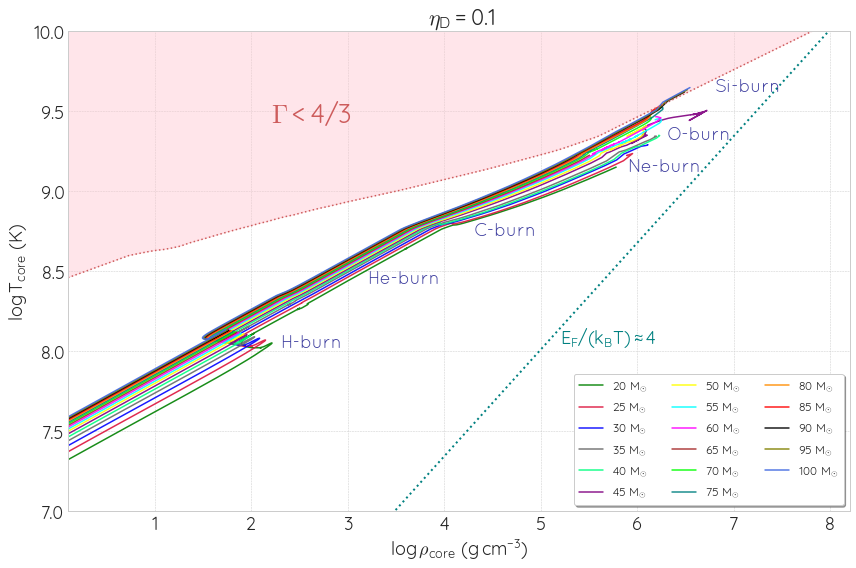


Gráfico guardado en: /fs/phaethon/other0/gibran/sim_results/Si28_5d-2_W9_D0.1/../plots/Tc_Rhoc_W0.9_D0.1.pdf


In [21]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
import os

# Ruta absoluta a la fuente Quicksand-Regular.ttf
font_path = '/fs/phaethon/other0/gibran/Quicksand-Regular.ttf'

# Registrar la fuente
fm.fontManager.addfont(font_path)

# Configurar Matplotlib para usar Quicksand
plt.rcParams['font.family'] = 'Quicksand'
plt.rcParams['font.sans-serif'] = ['Quicksand']
plt.rcParams['text.usetex'] = False  # Usar mathtext en lugar de LaTeX
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Quicksand'
plt.rcParams['mathtext.it'] = 'Quicksand:italic'
plt.rcParams['mathtext.bf'] = 'Quicksand:bold'

# Crear un objeto FontProperties para Quicksand
quicksand_font = FontProperties(fname=font_path)

# Resto del código (asumiendo que simulations, colors, masses, etc., están definidos)
# ================================================================
# 5. Graficar los datos y las líneas de referencia
# ================================================================
plt.figure(figsize=(12, 8))

for sim, color, mass in zip(simulations, colors, masses):
    history_path = os.path.join(base_path, sim, "history.data")
    if os.path.exists(history_path):
        history = mr.MesaData(history_path)
        initial_points_to_remove = 1
        final_points_to_remove = 1
        max_index = len(history.log_center_T) - final_points_to_remove
        
        plt.plot(history.log_center_Rho[initial_points_to_remove:max_index],
                 history.log_center_T[initial_points_to_remove:max_index],
                 label=fr'${mass}\ M_{{\odot}}$', color=color, fontproperties=quicksand_font, linewidth=1.5, alpha=0.9)
    else:
        print(f"Advertencia: {history_path} no encontrado para {sim}")

# Graficar la línea \(\Gamma < 4/3\) (interpolada)
log_rho_range = np.linspace(0.1, 9, 100)
log_t_interp = gamma_interp(log_rho_range)
plt.plot(log_rho_range, log_t_interp, color='indianred', linestyle=':')
plt.fill_between(log_rho_range, log_t_interp, 10, color='pink', alpha=0.4)

# Graficar la línea E_F/(k_B T) = 4
plot_fermi_line()

# Configuración de ejes y título
plt.xlabel(r'$\log \rho_\mathrm{core}\ \mathrm{(g\,cm^{-3})}$', fontsize=18)
plt.ylabel(r'$\log T_\mathrm{core}\ \mathrm{(K)}$', fontsize=18)
plt.title(rf' $\eta_{{\rm D}} = {eta_d}$', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(7, 10)
plt.xlim(0.1, 8.2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.style.use('seaborn-v0_8-whitegrid')

# Agregar leyenda (usará Quicksand por defecto)
plt.legend(loc='lower right', fontsize=12, ncol=3, frameon=True, shadow=True)

# Agregar etiqueta para \(\Gamma < 4/3\)
plt.text(2.2, 9.43, r"$\Gamma < 4/3$", fontsize=26, color='indianred')

# Agregar etiqueta para E_F/(k_B T)
plt.text(5.2, 8.05, r"$E_F/(k_B T)\approx 4$", fontsize=18, color='teal')

# Agregar anotaciones de fases de quemado con fuente Quicksand
for phase_name, (log_rho_val, log_t_val) in burn_phases.items():
    plt.text(log_rho_val, log_t_val, phase_name, fontproperties=quicksand_font, fontsize=18, color='navy', ha='left', va='bottom', alpha=0.75)

plt.tight_layout()

output_file = os.path.join(output_path, f'Tc_Rhoc_W{rotation}_D{eta_d}.pdf')
#plt.savefig(output_file, format="pdf")
plt.show()

print(f"\nGráfico guardado en: {output_file}")